In [165]:
#Importing the required Libraries
# !pip install
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# from ydata_profiling import ProfileReport
pd.set_option('display.max_columns',None)
# from pydantic_settings import BaseSettings # NEW
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score,log_loss,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as imbpipeline
from scipy.stats import randint
from scipy.stats import uniform
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [3]:
!gdown 1BhDQbXywCjAzF9fm74HClcN-HYECP4qs
!gdown 12iOMfz0OqH4x-gyOI1egRCNEwUzZiPry
!gdown 1P0Ha0l0fVgcmK8xNF8FQSqx2ECTd9Uu8

Downloading...
From: https://drive.google.com/uc?id=1BhDQbXywCjAzF9fm74HClcN-HYECP4qs
To: /content/payment.csv
100% 53.6M/53.6M [00:00<00:00, 59.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=12iOMfz0OqH4x-gyOI1egRCNEwUzZiPry
From (redirected): https://drive.google.com/uc?id=12iOMfz0OqH4x-gyOI1egRCNEwUzZiPry&confirm=t&uuid=55f6f081-15c0-4e1e-af21-e3f158034e2e
To: /content/loan.csv
100% 110M/110M [00:01<00:00, 57.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P0Ha0l0fVgcmK8xNF8FQSqx2ECTd9Uu8
To: /content/clarity_underwriting_variables.csv
100% 15.1M/15.1M [00:00<00:00, 57.5MB/s]


In [4]:
#Loading the data
loan_df=pd.read_csv('loan.csv',parse_dates=['applicationDate', 'originatedDate'])
payment_df=pd.read_csv('payment.csv',parse_dates=['paymentDate'])
clarity_df=pd.read_csv('clarity_underwriting_variables.csv')

print(f"The available loan data has {loan_df.shape[0]} rows & {loan_df.shape[1]} columns")
print(f"The available loan data has {payment_df.shape[0]} rows & {payment_df.shape[1]} columns")
print(f"The available loan data has {clarity_df.shape[0]} rows & {clarity_df.shape[1]} columns")

The available loan data has 577682 rows & 19 columns
The available loan data has 689364 rows & 9 columns
The available loan data has 49752 rows & 54 columns


The approach of selecting data where `isFunded=1` for modeling loan risk prediction is sound and can be supported by several key reasoning points, both from a business perspective and a data science standpoint:

### 1. **Focus on Relevant Population:**
   - **Reasoning:** The objective is to predict risk for loans that have already been funded by the company. The column `isFunded=1` indicates that the company has committed capital to these loans. By focusing on funded loans, we ensure that the model is trained on the most relevant data subset—those loans where the company has actual financial exposure.
   - **Impact:** This eliminates unnecessary noise from loans that were not funded. These non-funded loans might have been withdrawn by customers or rejected during the underwriting process for various reasons, which are unrelated to repayment risk once funding has occurred.

### 2. **Avoid Bias from Non-Funded Loans:**
   - **Reasoning:** Including non-funded loans (`isFunded=0`) in the modeling process introduces potential biases that do not reflect the actual repayment risk. Non-funded loans often involve applicants who withdrew their applications, did not meet underwriting criteria, or were rejected due to reasons not directly tied to repayment behavior.
   - **Impact:** Including such loans can skew the model's predictions because the circumstances leading to non-funding (like customer withdrawal) are unrelated to the factors that determine repayment risk for funded loans. This could lead to inaccurate risk assessment and poorer model performance.

### 3. **Aligning with Business Objectives:**
   - **Reasoning:** The goal of the model is to assess the repayment risk of loans that have been funded and are now part of the company’s loan portfolio. By limiting the dataset to funded loans, the model aligns directly with this business objective.
   - **Impact:** This approach ensures that the model's outputs are actionable. The company is primarily concerned with the risk of default for loans where money has been disbursed, and focusing on funded loans provides risk assessments that are directly applicable to managing the portfolio.

### 4. **Mitigating Class Imbalance:**
   - **Reasoning:** If non-funded loans are included in the modeling process, there could be a significant class imbalance, with a large proportion of non-funded loans. This imbalance can distort the model, leading to suboptimal predictions, as the model may overfit to the characteristics of non-funded applicants rather than focusing on actual repayment behavior.
   - **Impact:** By filtering for `isFunded=1`, the dataset is more balanced, ensuring that the model learns patterns that are representative of the funded loan population. This leads to a more robust and reliable model that better predicts default risk.

### 5. **Improved Interpretability and Model Insights:**
   - **Reasoning:** Focusing on funded loans makes the model easier to interpret, as the features and variables being analyzed pertain directly to those loans that are at risk of default. For example, variables like loan amount, interest rate (APR), and repayment terms are only relevant for funded loans.
   - **Impact:** By training the model exclusively on funded loans, it becomes easier to derive insights and take business actions. Features and patterns that emerge from the model will be more directly applicable to assessing loan risk and improving lending practices.

### 6. **Reducing Noise and Variance:**
   - **Reasoning:** Non-funded loans introduce additional noise and variance in the dataset, as they represent a different set of behaviors and outcomes. Applicants who were rejected or withdrew are fundamentally different from those who were funded, making their data less useful for predicting default risk.
   - **Impact:** By excluding non-funded loans, the model can focus on patterns that genuinely impact loan repayment, reducing unnecessary variance in the dataset. This results in a more accurate and reliable model.

### 7. **Focus on Key Business Metrics:**
   - **Reasoning:** The company’s key metrics, such as portfolio performance, loan default rates, and risk-adjusted returns, are driven by funded loans. The default risk prediction model should be designed to support and improve these key metrics, making the funded loan population the right focus.
   - **Impact:** By concentrating on loans that have been funded, the model provides insights that are directly relevant to improving the company's financial outcomes, such as minimizing default rates and optimizing risk-based pricing.

### Conclusion:
Focusing the modeling efforts on cases where `isFunded=1` is a justified approach because it directly targets the loans that pose a real financial risk to the company. This leads to cleaner data, reduces bias, enhances model interpretability, and ultimately results in more actionable and accurate predictions for managing loan portfolio risk. This approach is critical for optimizing risk management and ensuring the model aligns with the company's business objectives.

In [5]:
loan_df=loan_df[loan_df['isFunded']==1]

In [6]:
#Reducing the memory usage-
def reduce_mem_usage(df,name):
  """Reduces the memory usage of a dataset"""
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
          else:
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  print(f"{name}")
  print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [7]:
df_loan = reduce_mem_usage(loan_df,"Loan")
df_payment = reduce_mem_usage(payment_df, "Payment")
df_clarity = reduce_mem_usage(clarity_df, "Clarity")

Loan
Mem. usage decreased to  3.79 Mb (30.1% reduction)
Payment
Mem. usage decreased to 26.30 Mb (38.5% reduction)
Clarity
Mem. usage decreased to 16.80 Mb (18.1% reduction)


<Axes: xlabel='loanStatus'>

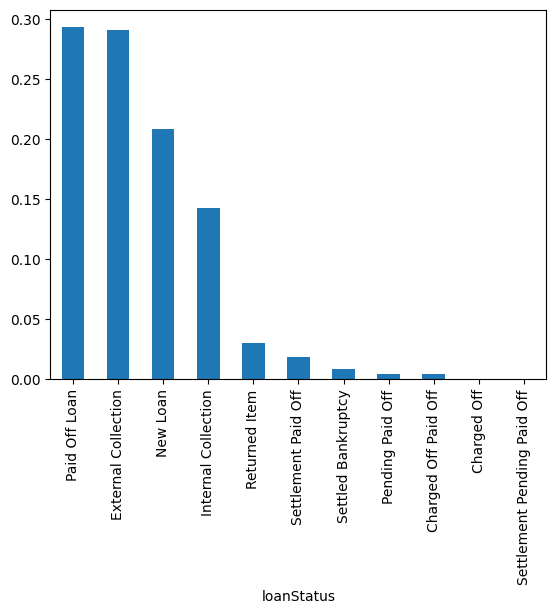

In [8]:
df_loan['loanStatus'].value_counts(normalize=True).plot(kind='bar')

In [9]:
#The current problem would focus more on the loans which were funded by the vendor & the potential risks in case the funding is done
#Also the data shows us that 78% of the customers withdraw their applications which itself reduces the data by 78% - The major work has to be done for the left 22% of the data



# Given that 78% of customers had withdrawn their applications, this is a significant portion of your dataset. This high withdrawal rate introduces important considerations for your modeling approach. Here’s how this might impact your decision on whether to include or exclude these records in your risk prediction model:

# ### 1. **Impact of High Withdrawal Rate:**
#    - **Data Imbalance:** If 78% of your dataset consists of withdrawn applications, the remaining 22% that were funded may not be representative of the entire population. This imbalance can affect your model's performance, particularly if you are predicting outcomes like default or successful repayment that only occur after funding.
#    - **Potential Bias:** Excluding such a large portion of the dataset might lead to bias in your model, where the characteristics of the funded loans could differ significantly from those of the broader customer base. For example, customers who withdraw might do so due to changes in their financial situation, loss of interest, or better offers elsewhere, which could be indicative of different risk profiles.

# ### 2. **Reasons for Withdrawal:**
#    - **Customer Decision-Making:** The high withdrawal rate suggests that a substantial number of customers change their minds after approval. Understanding the reasons behind these decisions could provide valuable insights. For instance, withdrawals could be associated with perceived unfavorable loan terms, a change in financial circumstances, or more competitive offers from other lenders.
#    - **Risk Indicators:** Customers who withdraw might inherently carry different risk profiles than those who proceed with the loan. For instance, a customer withdrawing due to high-interest rates might have been a potential default risk, or conversely, they might be financially prudent and thus less likely to default.

# ### 3. **Modeling Considerations:**
#    - **Separate Models:** One approach could be to build two separate models:
#      1. **Withdrawal Prediction Model:** Predict whether a customer will withdraw after approval. This can help the business understand what factors lead to withdrawals and potentially address these issues (e.g., offering better terms or additional incentives).
#      2. **Risk Prediction for Funded Loans:** Focus on funded loans only for predicting the likelihood of default or successful repayment. This model would be more focused on post-funding risks.
#    - **Incorporating Withdrawal as an Outcome:** Alternatively, you could include withdrawn loans in your model but treat withdrawal as a separate outcome category. This would allow you to predict not just default or repayment but also whether a loan is likely to be withdrawn, effectively creating a multi-class classification problem.
#    - **Feature Engineering:** If you decide to include withdrawn loans in your analysis, you might need to engineer features that capture why a loan was withdrawn, such as loan terms, customer demographics, or timing of withdrawal. These features could then help the model differentiate between loans that are likely to be withdrawn versus those that are likely to be funded and either paid off or defaulted.

# ### 4. **Business Insights:**
#    - **Understanding Customer Behavior:** The high withdrawal rate could be a sign that the loan offering needs to be adjusted to better meet customer needs or expectations. This insight could be valuable for product development, marketing strategies, and customer retention efforts.
#    - **Optimizing the Approval Process:** If the reasons for withdrawal are identified, the business could streamline the approval process or offer more competitive terms to reduce the withdrawal rate and increase the funding rate, ultimately improving business outcomes.

# ### Recommendation:
# Given the high withdrawal rate, it is crucial to consider this in your modeling strategy. A dual-model approach, where one model predicts the likelihood of withdrawal and the other focuses on risk prediction for funded loans, might provide the most comprehensive insights. Alternatively, including withdrawals as an outcome in a multi-class model could also be a viable strategy. Both approaches allow you to leverage the full dataset while addressing the different stages of the customer journey.

Filling null values in the `nPaidOff` column using the grouping approach based on `state`, `leadType`, and `payFrequency`. Here's the reasoning to support this approach:

### 1. **Contextual Relevance:**
   - **Reasoning:** The variables `state`, `leadType`, and `payFrequency` provide meaningful context about the loan applicants' characteristics and behavior. These factors likely influence the number of loans a customer has paid off in the past (`nPaidOff`), making them suitable for grouping when filling in missing values.
   - **Impact:** By grouping on these variables, you ensure that the imputed values are contextually relevant and reflective of similar customer segments, thereby maintaining the integrity of the dataset.

### 2. **Capturing Regional Differences (State):**
   - **Reasoning:** The `state` variable captures regional economic conditions, regulatory environments, and cultural factors that can affect borrowing behavior. For example, customers in different states might have different access to credit, varying default rates, or distinct financial practices, all of which could influence how many loans they have paid off.
   - **Impact:** Grouping by state allows the imputation process to account for these regional differences, leading to more accurate and representative median values for `nPaidOff`.

### 3. **Reflecting Customer Segments (LeadType):**
   - **Reasoning:** The `leadType` variable indicates the source or marketing channel through which the customer was acquired. Different lead types (e.g., organic, bvMandatory, repeat customers) often correlate with varying levels of creditworthiness, financial behavior, and loan performance history.
   - **Impact:** By grouping on `leadType`, you align the imputation process with the specific characteristics of different customer segments, ensuring that the filled values are in line with the behavior of customers who came through similar channels.

### 4. **Incorporating Payment Patterns (PayFrequency):**
   - **Reasoning:** The `payFrequency` variable reflects how often the customer is scheduled to make loan payments (e.g., biweekly, monthly). This can be indicative of the customer's financial discipline, income stability, and likelihood of repaying loans, which in turn can affect the number of loans they have successfully paid off in the past.
   - **Impact:** Grouping by pay frequency helps capture these nuances, allowing for a more tailored imputation that considers how customers with similar payment schedules typically perform in terms of loan repayment.

### 5. **Reducing Imputation Bias:**
   - **Reasoning:** Grouping by these variables before calculating the median for imputation reduces the risk of introducing bias into the dataset. It ensures that the imputed values for `nPaidOff` are not skewed by irrelevant or unrelated data points.
   - **Impact:** This approach results in more accurate and unbiased imputations, which helps preserve the relationships and patterns in the data, leading to better model performance and more reliable predictions.

### 6. **Preserving Data Variability:**
   - **Reasoning:** Instead of filling all missing values with a single global median, grouping by `state`, `leadType`, and `payFrequency` allows for the preservation of variability in the dataset. Each group is likely to have its own distinct median, reflecting the unique characteristics of that segment.
   - **Impact:** This method maintains the natural variability in the data, which is important for creating models that can generalize well and make accurate predictions across different segments.

### 7. **Data-Driven Approach:**
   - **Reasoning:** Using median values derived from specific groupings is a robust data-driven approach that minimizes the impact of outliers and extreme values. Medians are less sensitive to outliers compared to means, making them a reliable choice for imputation.
   - **Impact:** This leads to more stable and consistent imputed values, which contribute to the overall quality and reliability of the dataset.

### 8. **Alignment with Business Logic:**
   - **Reasoning:** This grouping approach aligns well with business logic and the practical realities of loan issuance and repayment. Customers from different regions, acquisition channels, and payment schedules are likely to have different financial behaviors, which should be reflected in how missing values are imputed.
   - **Impact:** By filling missing values in a way that aligns with business logic, you enhance the interpretability and applicability of the dataset for business decisions and model predictions.



In [11]:
group_medians = loan_df.groupby(['state', 'leadType','payFrequency'])['nPaidOff'].median()


In [12]:
def fill_nulls(row):
    if pd.isnull(row['nPaidOff']):
        return group_medians.loc[row['state'], row['leadType'],row['payFrequency']]
    else:
        return row['nPaidOff']

In [13]:
loan_df['nPaidOff'] = loan_df.apply(fill_nulls, axis=1)
loan_df['nPaidOff'].fillna(0,inplace=True)

In [14]:
classes = {
    1: ["Paid Off Loan", "Settlement Paid Off",'Charged Off Paid Off'],
    0: ["Customver Voided New Loan", "Settled Bankruptcy","Charged Off", "Customer Voided New Loan",'Settlement Pending Paid Off','External Collection', 'Internal Collection']
}

def map_classes(row):
  for key, value in classes.items():
    if row in value:
      return key

In [15]:
loan_df['target'] = loan_df['loanStatus'].map(map_classes)

<Axes: title={'center': 'Percentage of each class'}, xlabel='target'>

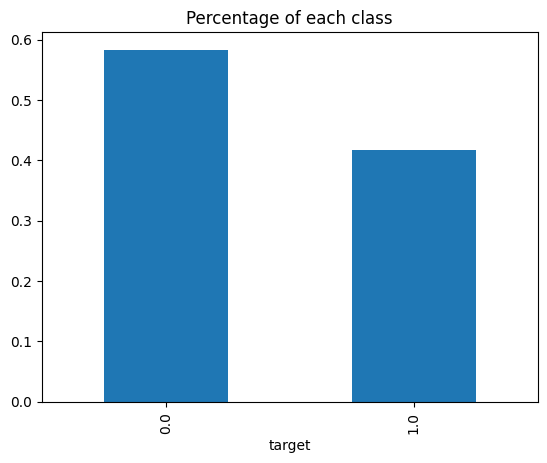

In [16]:
loan_df['target'].value_counts(normalize=True).plot(kind='bar', x='Class', title='Percentage of each class')

In [17]:
loan_df['target'].value_counts(normalize=True)

,proportion
target,
0.0,0.583522
1.0,0.416478


In [170]:
# If There is a huge difference between the positive class and the negative class which makes modelling the data difficult. To help mitigate the effects of a large class imbalance I could use SMOTE or EasyEnsemble to ensure the model is not biased towards the majority class which is the positive class. Moreover, this has shown that using plain accuracy as a metric to measure the performance of the model as a model with 97% accuracy here could just predict all the positive classes correctly but get all the negative classes wrongly which causes loans to be approved to people that are going to default on it causing losses to MoneyLion.

# The performance metric/s that needs to be chosen needs to perform well enough on detecting the positive classes as well as the negative classes and reduce the risk of false positives and false negatives from happening. For this I will look at the F1-score as the performance metric.

In [19]:
merged_df=pd.merge(loan_df, df_payment.loc[:, ["loanId", "isCollection","paymentStatus"]], left_on="loanId", right_on="loanId", how="left")
merged_df['target'] = merged_df['loanStatus'].map(map_classes)

By summing the payment amounts for each loanId, this method captures the total amount paid by the applicant for each loan. This aggregation simplifies the data by condensing multiple payment records into a single, comprehensive metric that can be easily combined with the main loan data. It provides a clear picture of the applicant's payment behavior and financial commitment, which is crucial for analyzing loan performance and predicting repayment risk.

In [20]:
df_payment_amount= df_payment.groupby(["loanId"]).paymentAmount.agg(total_amount_paid = 'sum').reset_index()
df_payment_amount.shape

(39952, 2)

In [21]:
combined_df=pd.merge(merged_df, df_payment_amount, left_on="loanId", right_on="loanId", how="left").drop_duplicates('loanId').reset_index()
combined_df.shape

(38982, 24)

In [22]:
combined_df['originallyScheduledPaymentAmount']=combined_df['originallyScheduledPaymentAmount'].astype(float)

combined_df['remainder_to_pay'] = combined_df['originallyScheduledPaymentAmount'] - combined_df['total_amount_paid']

In [23]:
df_loan_paid = combined_df[~combined_df.target.isna()]

In [24]:
losses_loan = df_loan_paid.remainder_to_pay.sum()
supposed_revenue = df_loan_paid.originallyScheduledPaymentAmount.sum()
total_amount_paid = df_loan_paid.total_amount_paid.sum()

In [25]:
print(f"Total amount overpaid by customers: {-losses_loan}\nExpected revenue: {supposed_revenue}\nTotal amount customers actually paid: {total_amount_paid}")

Total amount overpaid by customers: 7612423.231201172
Expected revenue: 49929743.75
Total amount customers actually paid: 57493108.0


In [27]:
combined_df['apr']=combined_df['apr'].astype(float)
combined_df['isFunded']=combined_df['isFunded'].astype(int)
combined_df['loanAmount']=combined_df['loanAmount'].astype(float)
combined_df['leadCost']=combined_df['leadCost'].astype(float)
combined_df['hasCF']=combined_df['hasCF'].astype(float)



 By computing the `remainder_to_pay`, we effectively measure the difference between what was originally scheduled to be paid (`originallyScheduledPaymentAmount`) and what was actually paid (`total_amount_paid`). This metric helps in understanding whether customers have overpaid, underpaid, or paid exactly as expected.

### Inferences:

1. **Total Amount Overpaid by Customers:**
   - The positive value of $7,612,423.23 indicates that, collectively, customers have paid more than the originally scheduled payment amounts. This overpayment could result from customers paying additional fees, prepaying their loans, or making extra payments. From a business perspective, this overpayment represents an unexpected financial gain.

2. **Expected Revenue:**
   - This value represents the total revenue that the company expected to collect based on the originally scheduled payment amounts for all loans. This is the baseline revenue the company anticipated when issuing these loans, assuming all customers paid exactly what was scheduled without any deviations.

3. **Total Amount Customers Actually Paid:**
   - This figure shows the total amount that customers actually paid, which includes both the scheduled payments and any additional amounts (e.g., fees, prepayments). The fact that this amount exceeds the expected revenue indicates that, on aggregate, customers paid more than the company initially planned for. This suggests that the company’s actual cash inflow from these loans is higher than the projected revenue.


The analysis highlights that customers have collectively overpaid by a significant amount, contributing to a total cash inflow that surpasses the expected revenue. This overpayment might reflect positive customer behaviors such as early repayment or voluntary extra payments, which are beneficial to the company's financial health. However, we can further investigate the reasons behind these overpayments to understand customer behavior better and to adjust future revenue projections and financial models accordingly.

In [29]:
def get_features(df):
  """
  Takes as input the dataframe and then returns
  the categorical, numerical and temporal variables
  in the dataframe
  in the form of a list
  """
  cat_feat = [num for num in df.columns if df[num].dtypes == "O" or df[num].dtypes == "bool"]
  numeric_feat = [num for num in df.columns if df[num].dtypes != "O"]
  temp_variables = [num for num in df.columns if df[num].dtype == "datetime64[ns]"]
  return cat_feat, numeric_feat, temp_variables

In [30]:
df_loan_paid["originatedDate"]=pd.to_datetime(df_loan_paid["originatedDate"],errors='coerce')
df_loan_paid["applicationDate"]=pd.to_datetime(df_loan_paid["applicationDate"],errors='coerce')

In [31]:
# Get the number of days the process of getting the loan took
df_loan_paid["days_to_process_loan"] = (df_loan_paid["originatedDate"] - df_loan_paid["applicationDate"]).dt.days

In [32]:
# def get_analysis_of_univariate_cat(df, colnames, nrows=2, mcols=2, width=20, height=30, sortbyindex=False):
#     fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
#     fig.set_facecolor('white')

#     rows = 0
#     for colname in colnames:
#         count = df[colname].value_counts(normalize=True) * 100
#         if sortbyindex:
#             count = count.sort_index()

#         # Plot bar chart for categorical features
#         count.plot.bar(color=sns.color_palette("Set2"), ax=ax[rows][0])
#         ax[rows][0].set_ylabel(f"Frequency of {colname} (%)", fontsize=14, family="Comic Sans MS")
#         ax[rows][0].set_xlabel(colname, fontsize=14, family="Comic Sans MS")

#         # Plot pie chart for categorical features
#         count.plot.pie(colors=sns.color_palette("Set2"), autopct='%0.0f%%',
#                        textprops={'fontsize': 10, 'family': "Comic Sans MS"}, ax=ax[rows][1])

#         rows += 1
#         if rows >= nrows:  # Break if more columns than rows provided
#             break

#     plt.tight_layout()
#     plt.show()


def get_analysis_of_univariate_cat(df, colnames, nrows=2, mcols=2, width=20, height=30, sortbyindex=False):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    fig.set_facecolor('white')

    # Flatten the axes array for easier indexing
    if nrows > 1 or mcols > 1:
        ax = ax.flatten()

    for i, colname in enumerate(colnames):
        count = df[colname].value_counts(normalize=True) * 100
        if sortbyindex:
            count = count.sort_index()

        # Plot bar chart for categorical features
        count.plot.bar(color=sns.color_palette("Set2"), ax=ax[i*2])
        ax[i*2].set_ylabel(f"Frequency of {colname} (%)", fontsize=14, family="Comic Sans MS")
        ax[i*2].set_xlabel(colname, fontsize=14, family="Comic Sans MS")

        # Plot pie chart for categorical features
        count.plot.pie(colors=sns.color_palette("Set2"), autopct='%0.0f%%',
                       textprops={'fontsize': 10, 'family': "Comic Sans MS"}, ax=ax[i*2+1])

        if i*2 + 2 >= len(ax):  # Break if more columns than axes provided
            break

    plt.tight_layout()
    plt.show()

In [33]:

def get_analysis_of_bivariate_cat(df, colnames, depend_var, nrows=2, mcols=2, width=14, height=20):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    sns.set(style='white')

    rows = 0
    cols = 0
    string = " based Distribution"

    for var in colnames:
        current_string = var + string

        # Countplot with x as dependent variable and hue as the current categorical variable
        sns.countplot(data=df, x=depend_var, hue=var, palette="Set2", ax=ax[rows][cols])
        ax[rows][cols].set_title(current_string, fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][cols].set_ylabel('Count', fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][cols].set_xlabel(depend_var, fontweight="bold", fontsize=14, family="Comic Sans MS")

        cols += 1
        if cols >= mcols:  # Move to the next row if the current row is filled
            cols = 0
            rows += 1

        if rows >= nrows:  # Stop if more variables than subplot grid provided
            break

        # Countplot with x as the current categorical variable and hue as the dependent variable
        sns.countplot(data=df, x=var, hue=depend_var, palette="Set2", ax=ax[rows][cols])
        ax[rows][cols].set_title(current_string, fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][cols].set_ylabel('Count', fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][cols].set_xlabel(var, fontweight="bold", fontsize=14, family="Comic Sans MS")

        cols += 1
        if cols >= mcols:  # Move to the next row if the current row is filled
            cols = 0
            rows += 1

        if rows >= nrows:  # Stop if more variables than subplot grid provided
            break

    plt.tight_layout()
    plt.show()

In [34]:
def get_outlier(df, colnames, nrows=2, mcols=2, width=14, height=20):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    fig.set_facecolor("lightgrey")

    sns.set(style="whitegrid")

    rows = 0
    cols = 0

    for var in colnames:
        # Plot Boxplot to get outliers for continuous numerical features
        sns.boxplot(y=df[var], color='m', ax=ax[rows][cols])
        ax[rows][cols].set_title(f"Boxplot for {var} Outlier Detection", fontweight="bold", fontsize=14)
        ax[rows][cols].set_ylabel(var, fontsize=12, family="Comic Sans MS")

        cols += 1
        if cols >= mcols:
            cols = 0
            rows += 1

        if rows >= nrows:
            break

        # Plot distplot to get distribution for continuous numerical features
        sns.histplot(df[var], kde=True, color='m', ax=ax[rows][cols])

        # Get mean, median, mode vertical lines
        ax[rows][cols].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][cols].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][cols].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")

        # Set the title
        ax[rows][cols].set_title(f"Distribution & Outliers in {var}", fontweight="bold", fontsize=14)

        # Add the legend
        ax[rows][cols].legend()

        cols += 1
        if cols >= mcols:
            cols = 0
            rows += 1

        if rows >= nrows:
            break

    plt.tight_layout()
    plt.show()

In [35]:
def num_cat_bi(df, col_cat, col_num, nrows=1, mcols=2, width=15, height=6):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height), squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")

    rows = 0
    i = 0

    while rows < nrows and i < len(col_cat):
        # Box plot for the first categorical variable with numerical target
        sns.boxplot(x=col_cat[i], y=col_num, data=df, ax=ax[rows][0], palette="Paired")
        ax[rows][0].set_xlabel(col_cat[i], fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][0].set_ylabel(col_num, fontweight="bold", fontsize=14, family="Comic Sans MS")

        i += 1
        if i >= len(col_cat):  # Break if no more columns to plot
            break

        # Box plot for the second categorical variable with numerical target
        sns.boxplot(x=col_cat[i], y=col_num, data=df, ax=ax[rows][1], palette="Paired")
        ax[rows][1].set_xlabel(col_cat[i], fontweight="bold", fontsize=14, family="Comic Sans MS")
        ax[rows][1].set_ylabel(col_num, fontweight="bold", fontsize=14, family="Comic Sans MS")

        i += 1
        rows += 1

    plt.tight_layout()
    plt.show()

In [36]:
df_v1=combined_df.copy()
df_v1.shape

(38982, 25)

In [37]:
#Capturing the df_clarity data
df = pd.merge(df_loan_paid, df_clarity, left_on="clarityFraudId", right_on="underwritingid", how="left")

In [38]:
df.shape

(29519, 80)

In [39]:
df_v1.columns

Index(['index', 'loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF', 'target',
       'isCollection', 'paymentStatus', 'total_amount_paid',
       'remainder_to_pay'],
      dtype='object')

In [40]:
# 'index', 'loanId', 'anon_ssn', 'applicationDate',
#        'originated', 'originatedDate',

In [41]:
for i in df_v1.columns:
  if i not in ['index', 'loanId', 'anon_ssn', 'applicationDate',
       'originated', 'originatedDate']:
       print(i, ': ' + str(df_v1[i].nunique()) + '\n', df_v1[i].unique())


payFrequency : 5
 ['B' 'W' 'S' 'M' 'I']
apr : 116
 [199.       475.       645.       490.       590.       404.
 315.       601.       450.       550.       625.       359.
 472.       325.       405.       360.       516.       680.
 681.       390.       441.       251.       650.       159.
 208.       596.       465.       501.5      525.       180.25
 306.       217.       580.       585.       540.       290.
 324.       449.       478.75     443.       531.       600.
 381.75     565.        95.       569.       139.125    231.
 427.5      570.5      500.       510.       541.       440.
 300.       562.5      515.        44.       241.       416.5
 340.       288.       265.       552.5      240.       505.
 415.       194.       382.5      355.       239.         0.
 555.       547.       242.       613.       160.       480.
 400.       510.75     428.75     530.       182.       171.
 455.       705.5      143.125    365.       578.       351.
 564.5      660.        29.9843

In [42]:
df_v1.head()

,index,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,target,isCollection,paymentStatus,total_amount_paid,remainder_to_pay
0,0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6396.0,CA,prescreen,0.0,Checked,569eb3a3e4b096699f685d64,1.0,1.0,False,Checked,7087.5000,-691.5000
1,25,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,True,2016-11-29T20:30:40.640000,2.0,True,1,New Loan,350.0,894.0,MO,organic,0.0,Checked,NaN,0.0,NaN,False,Checked,893.6250,0.3750
2,38,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,New Loan,400.0,1365.0,NJ,lead,40.0,Checked,58b6eef8e4b0b6fca82fd426,1.0,NaN,False,Pending,1364.9375,0.0625
3,64,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,Paid Off Loan,1250.0,3314.0,MO,organic,0.0,Checked,58450a15e4b0bb9d6d7344c7,1.0,1.0,False,Checked,4649.0000,-1335.0000
4,77,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,Paid Off Loan,800.0,2432.0,CA,bvMandatory,10.0,Checked,578f9346e4b0810ad5e7b72e,1.0,1.0,False,Checked,2432.7500,-0.7500


In [43]:
df_v1['payFrequency']=df_v1['payFrequency'].astype('category')
df_v1['originated']=df_v1['originated'].astype('category')
df_v1['approved']=df_v1['approved'].astype('category')
df_v1['isFunded']=df_v1['isFunded'].astype('category')
df_v1['loanStatus']=df_v1['loanStatus'].astype('category')
df_v1['state']=df_v1['state'].astype('category')
df_v1['leadType']=df_v1['leadType'].astype('category')
df_v1['fpStatus	']=df_v1['fpStatus'].astype('category')
df_v1['hasCF']=df_v1['hasCF'].astype('category')
df_v1['isCollection']=df_v1['isCollection'].astype('category')

In [44]:
cat_cols = list([col for col in df_v1.columns if df_v1[col].dtypes =='category'])

cat_cols

['payFrequency',
 'originated',
 'approved',
 'isFunded',
 'loanStatus',
 'state',
 'leadType',
 'hasCF',
 'isCollection',
 'fpStatus\t']

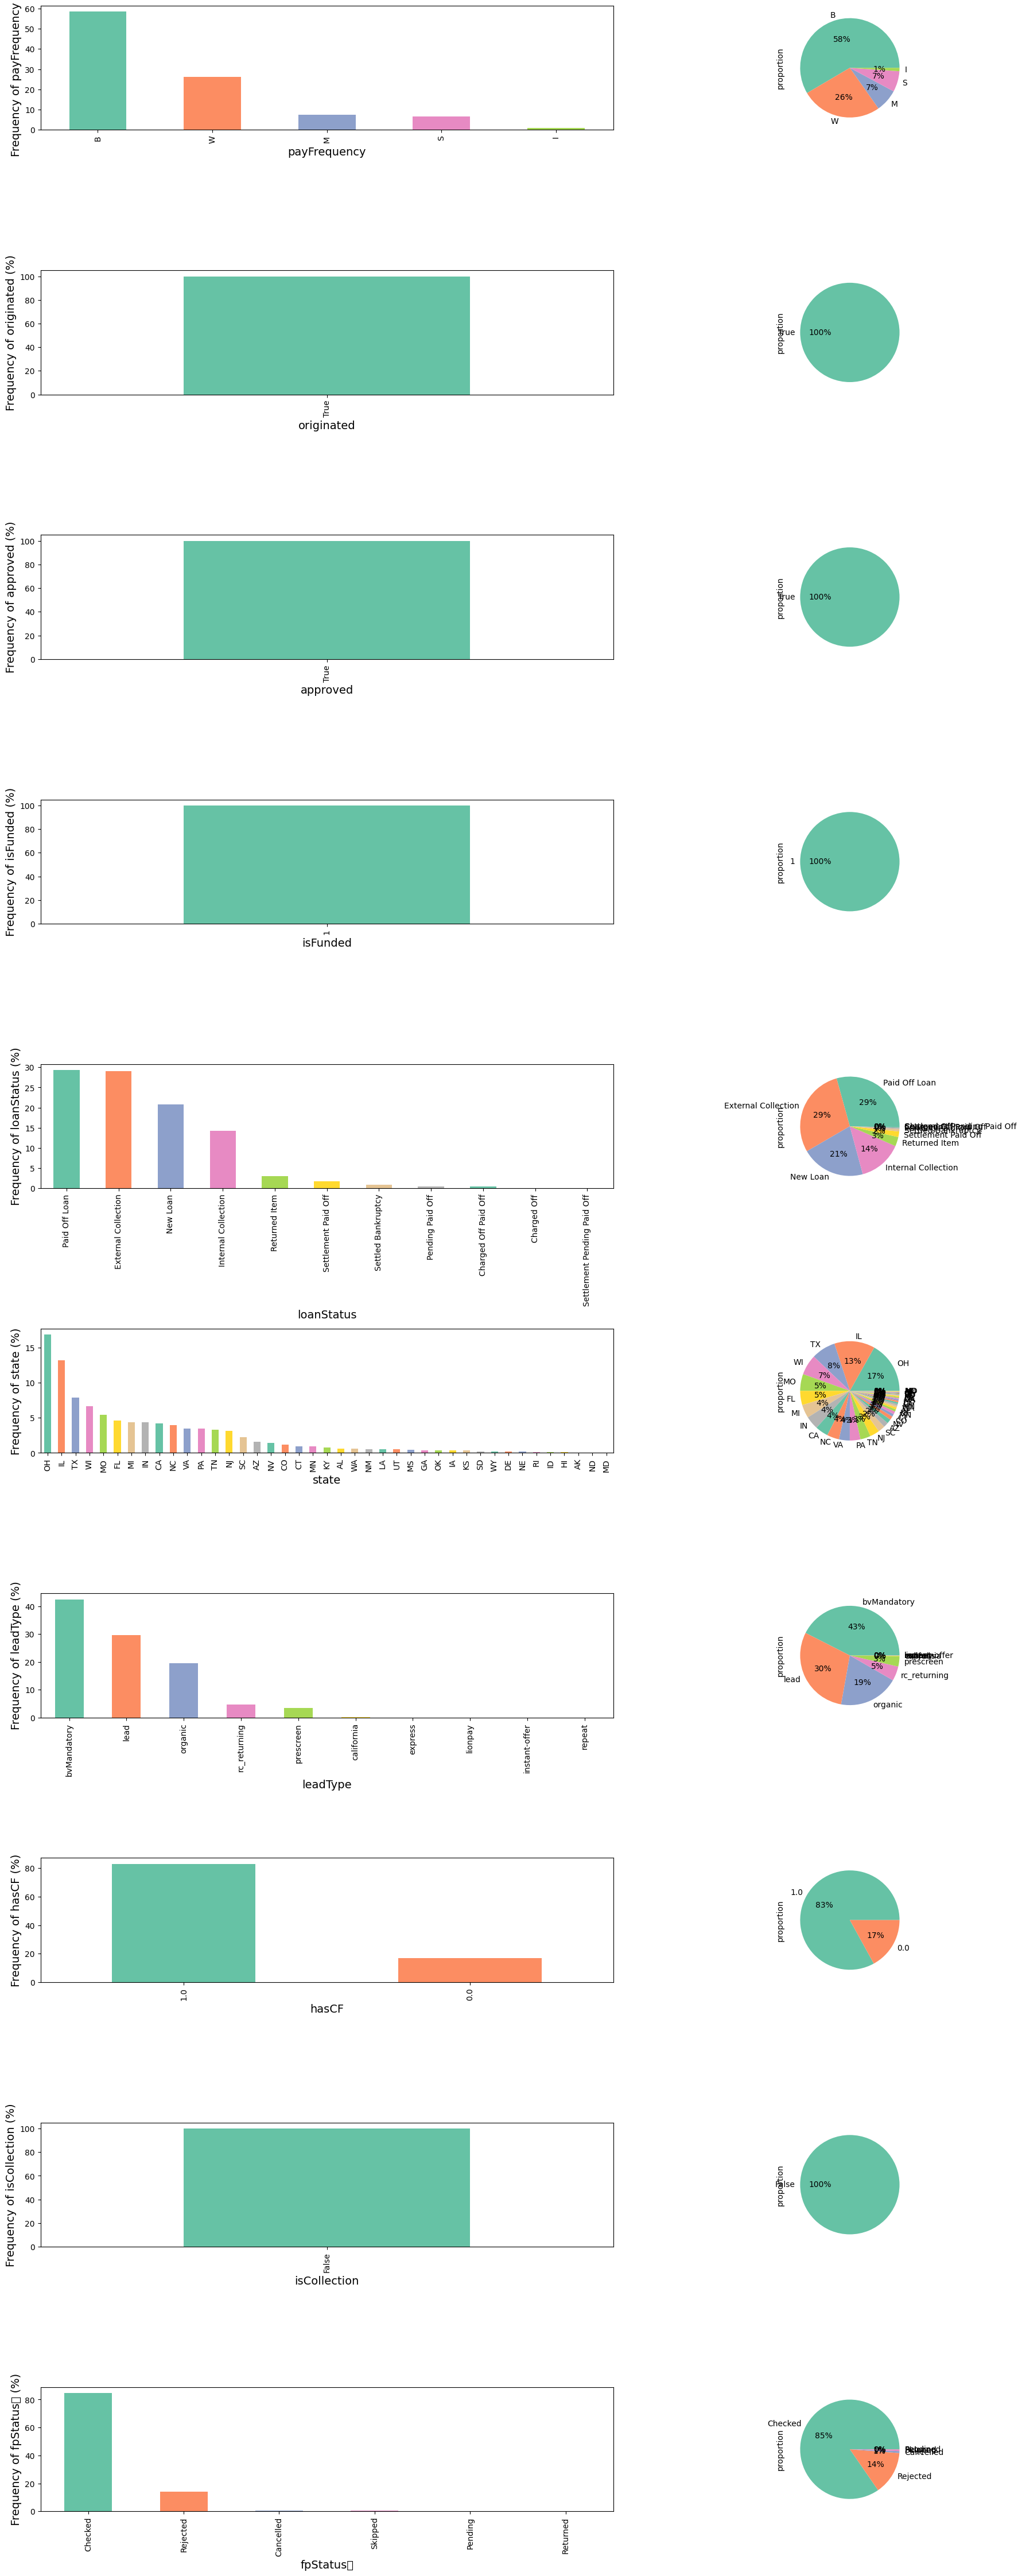

In [45]:
get_analysis_of_univariate_cat(df_v1, cat_cols, len(cat_cols), 2, 20, 45)

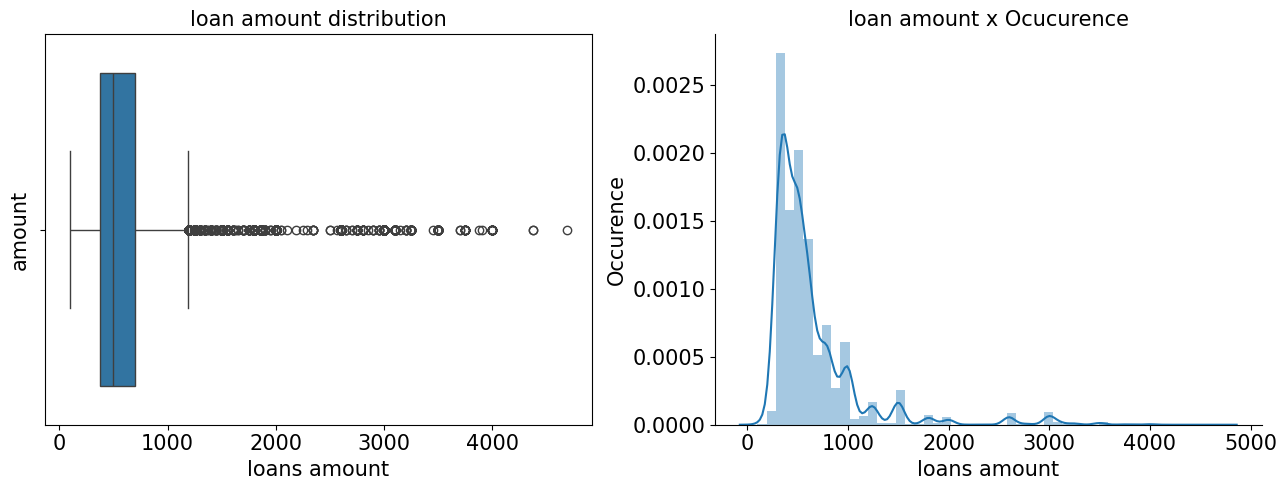

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'loanAmount', data = df_v1, orient = 'v', ax = ax1)
ax1.set_xlabel('loans amount', fontsize=15)
ax1.set_ylabel('amount', fontsize=15)
ax1.set_title('loan amount distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df_v1['loanAmount'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('loans amount', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('loan amount x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


Loan Amount Distribution:

The plot shows that the majority of loan amounts are concentrated below 1000 units, with a significant presence of outliers extending up to around 4000–5000 units.
This indicates that while most loans are relatively small, there are some larger loans that could be significant in understanding risk or repayment patterns.


The density plot confirms the observation from the box plot, with a sharp peak around lower loan amounts (below 1000 units) and a long tail representing higher loan amounts.
The right-skewed distribution suggests that the majority of loans are small, with fewer high-value loans. This could imply that most customers are borrowing smaller amounts, but the high-value loans, although fewer, might carry more risk or different characteristics.
These plots together suggest that the dataset is dominated by smaller loans, but there are significant outliers that may warrant further investigation, particularly in relation to repayment risk or customer segmentation.

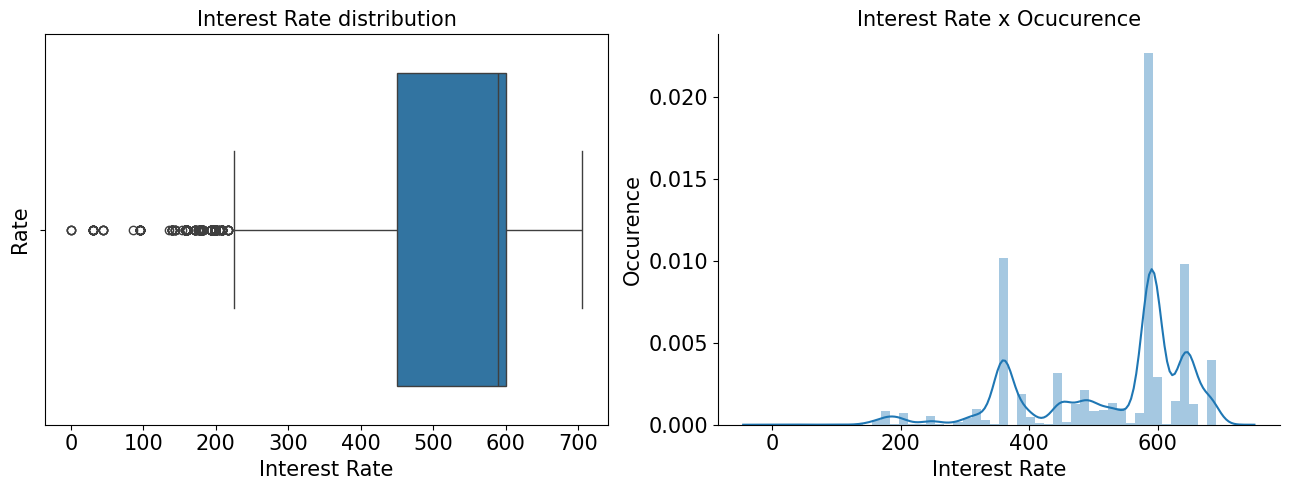

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'apr', data = df_v1, orient = 'v', ax = ax1)
ax1.set_xlabel('Interest Rate', fontsize=15)
ax1.set_ylabel('Rate', fontsize=15)
ax1.set_title('Interest Rate distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df_v1['apr'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Interest Rate', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Interest Rate x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [48]:
cat_cols=['payFrequency',
 'originated',
 'approved',
 'isFunded',
 'state',
 'leadType',
 'hasCF',
 'isCollection',
 'fpStatus\t']

# get_analysis_of_bivariate_cat(df_v1, cat_cols, 'loanStatus', 11, 2)


In [49]:
df_count = df_v1.groupby('leadType')['target'].apply(lambda x: (x ==1).sum()).reset_index(name='count')


In [50]:
df_count.sort_values(by = 'count', ascending=False).head(5)

,leadType,count
0,bvMandatory,4803
6,organic,3556
4,lead,2741
8,rc_returning,632
7,prescreen,511


In [51]:
def missingValue(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total number of records = ", df.shape[0])
    md = pd.concat([total_null, percent.round(2)],axis=1,keys=['Total Missingvalues','In Percent'])
    return md

missingValue(df_v1)


Total number of records =  38982


,Total Missingvalues,In Percent
target,9463,24.28
clarityFraudId,6622,16.99
paymentStatus,1810,4.64
remainder_to_pay,104,0.27
total_amount_paid,104,0.27
isCollection,104,0.27
fpStatus\t,9,0.02
fpStatus,9,0.02
loanId,0,0.00
hasCF,0,0.00


In [52]:
df_v2 = df_v1.dropna(subset=['remainder_to_pay', 'target'], how='all')
missingValue(df_v2)

Total number of records =  38892


,Total Missingvalues,In Percent
target,9373,24.10
clarityFraudId,6621,17.02
paymentStatus,1720,4.42
remainder_to_pay,14,0.04
total_amount_paid,14,0.04
isCollection,14,0.04
fpStatus\t,8,0.02
fpStatus,8,0.02
loanId,0,0.00
hasCF,0,0.00


In [53]:
num_cols = [col for col in df_v2.columns if df_v2[col].dtypes in ('float64','int32', 'int64', 'float32')]
num_cols

['index',
 'apr',
 'nPaidOff',
 'loanAmount',
 'originallyScheduledPaymentAmount',
 'leadCost',
 'target',
 'total_amount_paid',
 'remainder_to_pay']

In [54]:
num_col = ['total_amount_paid', 'remainder_to_pay']

In [55]:
df_v3 = df_v2.copy()
for col in num_col:
    # removing outlier of the data
    Q3 = df_v3[col].quantile(0.75)
    Q1 = df_v3[col].quantile(0.25)
    IQR = Q3 - Q1
    print('Lower limit of ' + col + ' : ', Q1 - 1.5 * IQR)
    print('Higher limit of ' + col + ' : ', Q3 + 1.5 * IQR)
    new_df = df_v3[(df_v3[col] > Q1 - 1.5 * IQR) & (df_v3[col] < Q3 + 1.5 *IQR)]
    print('Before Outlier removal count: ' + str(df_v3.shape[0]))
    print('After Outlier removal count: ' + str(new_df.shape[0]))
    print('% of data removed : ', ((df_v3.shape[0] - new_df.shape[0])/df_v3.shape[0]) * 100 )
    print('\n')


Lower limit of total_amount_paid :  -529.6171875
Higher limit of total_amount_paid :  3882.5703125
Before Outlier removal count: 38892
After Outlier removal count: 36162
% of data removed :  7.019438444924406


Lower limit of remainder_to_pay :  -536.41015625
Higher limit of remainder_to_pay :  322.24609375
Before Outlier removal count: 38892
After Outlier removal count: 33668
% of data removed :  13.432068291679522




In [56]:
for col in num_col:
# choosing 99 percentile as threshold
    upper_limit = df_v3[col].quantile(.99)
    lower_limit = df_v3[col].quantile(.01)
    print('Lower limit of ' + col + ' : ', lower_limit)
    print('Higher limit of ' + col + ' : ', upper_limit)
    new_df = df_v3[(df_v3[col] >= lower_limit) & (df_v3[col] <= upper_limit)]
    print('Before Outlier removal count: ' + str(df_v3.shape[0]))
    print('After Outlier removal count: ' + str(new_df.shape[0]))
    print('% of data removed : ', ((df_v3.shape[0] - new_df.shape[0])/df_v3.shape[0]) * 100 )
    print('\n')

Lower limit of total_amount_paid :  603.49384
Higher limit of total_amount_paid :  8289.558
Before Outlier removal count: 38892
After Outlier removal count: 38100
% of data removed :  2.0364085158901575


Lower limit of remainder_to_pay :  -2047.5743750000001
Higher limit of remainder_to_pay :  151.25
Before Outlier removal count: 38892
After Outlier removal count: 38103
% of data removed :  2.028694847269361




In [57]:
for col in num_col:
# choosing 99 percentile as threshold and then applying capping/
    #winsorization technique
    upper_limit = df_v3[col].quantile(.99)
    lower_limit = df_v3[col].quantile(.01)
    print('Lower limit of ' + col + ' : ', lower_limit)
    print('Higher limit of ' + col + ' : ', upper_limit)
    new_df = np.where(df_v3[col] >= upper_limit,
    upper_limit,np.where(df_v3[col] <= lower_limit,
    lower_limit, df_v3[col]))
    print('Before Outlier removal count: ' + str(df_v3.shape[0]))
    print('After Outlier removal count: ' + str(new_df.shape[0]))
    print('% of data removed : ', ((df_v3.shape[0] - new_df.shape[0])/df_v3.shape[0]) * 100 )
    print('\n')


Lower limit of total_amount_paid :  603.49384
Higher limit of total_amount_paid :  8289.558
Before Outlier removal count: 38892
After Outlier removal count: 38892
% of data removed :  0.0


Lower limit of remainder_to_pay :  -2047.5743750000001
Higher limit of remainder_to_pay :  151.25
Before Outlier removal count: 38892
After Outlier removal count: 38892
% of data removed :  0.0




In [58]:
# Removing the outliers using percentiles method
def removeOutliers(data, col):
    upper_limit = df_v3[col].quantile(.99)
    lower_limit = df_v3[col].quantile(.01)
    print('Lower limit of ' + col + ' : ', lower_limit)
    print('Higher limit of ' + col + ' : ', upper_limit)
    global outlier_free_list
    global filtered_data
    outlier_free_list = [x for x in data[col] if ((x > lower_limit) & (x <upper_limit ))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

for i in num_col:
        removeOutliers(df_v3, i)
      # else:
      #   removeOutliers(filtered_data, i)


data_reduced = filtered_data
print("Shape of data before outlier removal is : ", df_v3.shape)
print("Shape of data after outlier removal is : ", data_reduced.shape)



Lower limit of total_amount_paid :  603.49384
Higher limit of total_amount_paid :  8289.558
Lower limit of remainder_to_pay :  -2047.5743750000001
Higher limit of remainder_to_pay :  151.25
Shape of data before outlier removal is :  (38892, 26)
Shape of data after outlier removal is :  (38099, 26)


In [59]:
df = pd.merge(data_reduced, df_clarity, left_on="clarityFraudId", right_on="underwritingid", how="left")
df.shape

(38099, 80)

In [60]:
df['clearfraudscore'] = df['clearfraudscore'].fillna(value=df['clearfraudscore'].mean())

In [61]:
missingValue(df)

Total number of records =  38099


,Total Missingvalues,In Percent
.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,37135,97.47
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,36363,95.44
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription,36363,95.44
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,34577,90.76
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,34577,90.76
...,...,...
hasCF,0,0.00
isCollection,0,0.00
total_amount_paid,0,0.00
remainder_to_pay,0,0.00


In [62]:
def remove_constant_columns(df):
    """
    Removes columns from a DataFrame that have a constant value across all rows.

    """
    non_constant_df = df.loc[:, df.apply(pd.Series.nunique) > 1]

    return non_constant_df

df_cleaned = remove_constant_columns(df)


In [63]:
df_cleaned.shape

(38099, 70)

In [64]:
def remove_constant_and_high_nan_columns(df, target_column, nan_threshold=0.5):
    """
    Removes columns from a DataFrame that have a constant value across all rows
    or have more than a specified percentage of NaN values, excluding the target column.


    """
    # Exclude the target column from the columns to be processed
    columns_to_check = df.columns.difference([target_column])

    # Remove constant columns, excluding the target column
    non_constant_columns = columns_to_check[df[columns_to_check].apply(pd.Series.nunique) > 1]

    # Remove columns with more than nan_threshold% NaN values, excluding the target column
    non_high_nan_columns = non_constant_columns[df[non_constant_columns].isna().mean() <= nan_threshold]

    # Include the target column back in the resulting DataFrame
    final_columns = non_high_nan_columns.tolist() + [target_column]

    return df[final_columns]
df_cleanedd = remove_constant_and_high_nan_columns(df_cleaned,'target')
df_cleanedd.shape

(38099, 63)

In [65]:
final_df=df_cleanedd.copy()

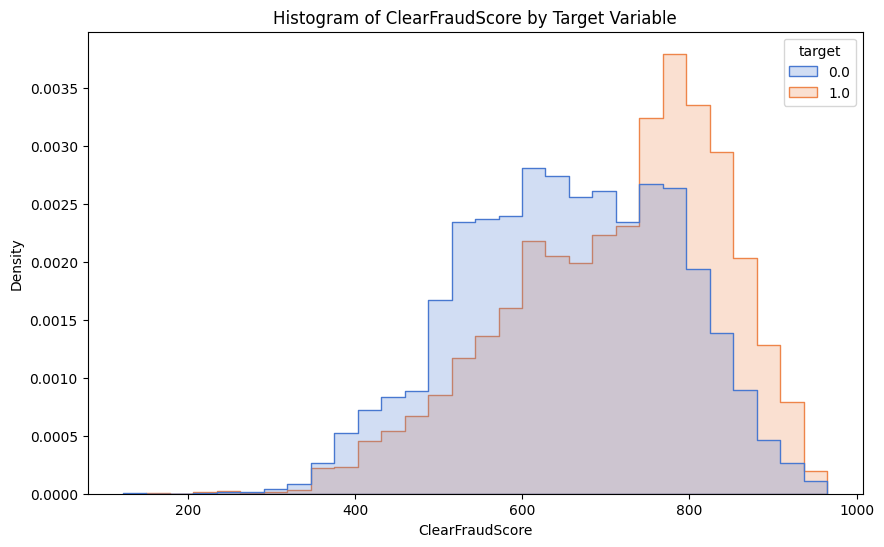

In [66]:
plt.figure(figsize=(10, 6))

# Plot histograms for each target category
sns.histplot(data=df_cleanedd, x='clearfraudscore', hue='target', kde=False, bins=30, palette='muted', element='step', stat="density", common_norm=False)

# Add titles and labels
plt.title('Histogram of ClearFraudScore by Target Variable')
plt.xlabel('ClearFraudScore')
plt.ylabel('Density')

# Show the plot
plt.show()

In [67]:
final_df.drop(['underwritingid'],axis=1,inplace=True)

In [68]:
final_df.shape

(38099, 62)

In [69]:
final_df=final_df[~final_df['target'].isnull()]
final_df.shape

(28941, 62)

In [70]:
pivotpayment= df_payment.pivot_table(index='loanId',values='installmentIndex',columns='paymentStatus',aggfunc='count',fill_value=0).rename_axis(None, axis=1).reset_index()
pivotpayment.head()

,loanId,Cancelled,Checked,Complete,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped
0,LL-I-00000021,0,12,0,0,1,0,0,0
1,LL-I-00000231,8,2,0,0,2,0,0,0
2,LL-I-00000238,4,7,0,0,1,0,0,0
3,LL-I-00000308,10,1,0,0,1,0,0,0
4,LL-I-00000355,11,0,0,0,1,0,0,0


In [71]:
loan_data=(final_df.merge(pivotpayment, on='loanId', how='left'))
loan_data.shape

(28941, 70)

In [72]:
cols = ['Cancelled', 'Checked', 'Complete',
       'Pending', 'Rejected', 'Rejected Awaiting Retry', 'Returned',
       'Skipped']
loan_data[cols]=loan_data[cols].fillna(0)

In [73]:
# Columns that should not be standardized
col = ['isCollection', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict', '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk', '.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious','.underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days', '.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential', '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate', '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid', '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk', '.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile', '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified', '.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother', '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly', '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18', '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate', '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone', '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone', 'target', '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile']

In [74]:
def get_features(df):
  """
  Takes as input the dataframe and then returns
  the categorical, numerical and temporal variables
  in the dataframe
  in the form of a list
  """
  cat_feat = [num for num in df.columns if df[num].dtypes == "O" or df[num].dtypes == "bool" or df[num].dtypes=='category']
  numeric_feat = [num for num in df.columns if df[num].dtypes != "O"]
  temp_variables = [num for num in df.columns if df[num].dtype == "datetime64[ns]"]
  return cat_feat, numeric_feat, temp_variables

In [75]:
categorical_cols, numerical_cols, _ = get_features(loan_data)
categorical_cols

['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days',

In [76]:
categorical_columns, _, _ = get_features(loan_data)
cat_cols = categorical_columns + col
categorical_columns_ = [cols for cols in cat_cols if cols not in ['.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile', 'target']]
print(categorical_columns_)

['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch', '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch', '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18', '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly', '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days', '.underwr

In [77]:
categorical_columns_ = [col for col in categorical_columns if col not in ['isCollection',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone''anon_ssn',
 'applicationDate',
 'clarityFraudId',
 'fpStatus',
 'fpStatus\t',
 'hasCF',
 'leadType',
 'loanId',
 'loanStatus',
 'originatedDate',
 'payFrequency',
 'state']]

In [78]:
# Fill missing categories with "Missing"
loan_data[categorical_columns_] = loan_data[categorical_columns_].fillna("Missing")

In [79]:
missingValue(loan_data)

Total number of records =  28941


,Total Missingvalues,In Percent
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,4991,17.25
.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,4982,17.21
.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,4982,17.21
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,4967,17.16
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,4967,17.16
...,...,...
.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential,0,0.00
.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,0,0.00
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,0,0.00
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,0,0.00


In [80]:
numerical_cols_ = [column for column in numerical_cols if column not in col]
print(numerical_cols_)

['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode', '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount', '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators', '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago', 'apr', 'clearfraudscore', 'fpStatus\t', 'hasCF', 'index', 'leadCost', 'leadTy

In [81]:

numerical_cols_=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago']

In [82]:
for cols in numerical_cols_:
    loan_data[cols].fillna(loan_data[cols].median(),inplace=True)

In [83]:
loan_data['ssnLoanCount'] = loan_data['anon_ssn'].map(loan_data.groupby('anon_ssn')['loanId'].size())

In [84]:
# From this we can know who is the top 10 client have the highest count of ssnLoanCount
popularcustL = loan_data[['anon_ssn','ssnLoanCount']]
popularcustL.drop_duplicates().sort_values(by='ssnLoanCount', ascending=False).iloc[:10,:]

,anon_ssn,ssnLoanCount
2345,228060b9cc8af6a937d0321122d459f3,12
3059,6877f00bb6989f7d49b2b80ecb52e589,10
2865,e1a86024a1433fa71989ac32bb4255c4,8
3718,b4a3dc71f61eab12616cbd41c27b7788,8
9300,517eaf8f849846fe5a5dfb5f573bb8cd,8
3496,b8220b6957a50194e6f21b325e4eecb7,7
1245,39fe1fcc437429b12d635e75d550f631,7
381,c8bb49de1f8ff99d2ecddfb7037dc66e,7
7571,7732b7bf2d3fc1083884ed363109dc63,6
5097,61a1dd3576a44b573a47a84f99b9752a,6


In [85]:
tloanfunded2 = loan_data.drop(['loanId','anon_ssn','applicationDate','loanStatus','clarityFraudId'], axis=1)

In [86]:
tloanfunded2['originallyScheduledPaymentAmount']=tloanfunded2['originallyScheduledPaymentAmount'].round()

In [87]:

toint = ['leadCost','loanAmount','originallyScheduledPaymentAmount','apr','nPaidOff', 'Cancelled','Checked','Complete','Pending','Rejected','Rejected Awaiting Retry', 'Returned', 'Skipped','clearfraudscore']
tloanfunded2[toint] = tloanfunded2[toint].astype(int,errors='ignore')
tloanfunded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28941 entries, 0 to 28940
Data columns (total 66 columns):
 #   Column                                                                                             Non-Null Count  Dtype   
---  ------                                                                                             --------------  -----   
 0   .underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch                28941 non-null  object  
 1   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode          28941 non-null  float16 
 2   .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult              28941 non-null  object  
 3   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult                28941 non-null  object  
 4   .underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype                  28941 non-nul

In [88]:
tloanfunded2.drop([
    "fpStatus\t",
 'fpStatus',
 'originatedDate',
 'paymentStatus'],axis=1,inplace=True)

In [89]:
def get_features(df):
  """
  Takes as input the dataframe and then returns
  the categorical, numerical and temporal variables
  in the dataframe
  in the form of a list
  """
  cat_feat = [num for num in df.columns if df[num].dtypes == "O" or df[num].dtypes == "bool" or df[num].dtypes == "category"]
  numeric_feat = [num for num in df.columns if df[num].dtypes != "O"]
  temp_variables = [num for num in df.columns if df[num].dtype == "datetime64[ns]"]
  return cat_feat, numeric_feat, temp_variables

In [90]:
categorical_columns_,_,_=get_features(tloanfunded2)
categorical_columns_=[col for col in categorical_columns_ if col not in 'state' ]

In [91]:
categorical_columns_

['.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch',
 '.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days',

In [92]:
tloanfunded2 = pd.get_dummies(tloanfunded2, columns=categorical_columns_)
tloanfunded2.shape

(28941, 156)

In [93]:
state_mean = tloanfunded2.groupby('state')['target'].mean()
state_mean

,target
state,
AK,0.000000
AL,0.243590
AZ,0.350785
CA,0.282306
CO,0.203390
CT,0.475676
DE,0.229167
FL,0.286865
GA,0.185185


In [94]:
tloanfunded2['state_encoded'] = tloanfunded2['state'].map(state_mean)

# 3. Handle unseen states by replacing them with the global mean of the target variable
global_mean = tloanfunded2['target'].mean()

tloanfunded2['state']=tloanfunded2['state'].astype('str')
tloanfunded2['state_encoded'] = tloanfunded2['state'].map(state_mean).fillna(global_mean)

In [95]:
tloanfunded2.drop('state',axis=1,inplace=True)

In [96]:
tloanfunded2.drop('index',axis=1,inplace=True)

In [97]:
tloanfunded2['clearfraudscore'].replace(np.inf,0,inplace=True)

In [98]:
loan_funded=tloanfunded2.copy()

###Modelling Approach - 1


*   Using entire data (loans, payments,clarity) for modelling purposes.



In [99]:
# Separate input features and target
x_data = tloanfunded2.drop(columns=['target'])
y_data = tloanfunded2['target']

In [100]:
# Apply oversampling method

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data,random_state=123, test_size=0.30)



In [101]:

# # concatenate our training data back together
# x_sample = pd.concat([xtrain, ytrain], axis=1)
# targetcust = x_sample[x_sample['target']== 1]
# ntargetcust = x_sample[x_sample['target']== 0]


# ntargetcust_upsampled = resample(ntargetcust,
#                           replace=True, # sample with replacement
#                           n_samples=len(targetcust), # match number in majority class
#                           random_state=123) # reproducible results


# otloanfunded2 = pd.concat([targetcust, ntargetcust_upsampled])
# x_data = otloanfunded2.drop(columns=['target'])
# y_data = otloanfunded2['target']

# # setting up testing and training set
# xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain,random_state=123, test_size=0.30)


<Axes: xlabel='target'>

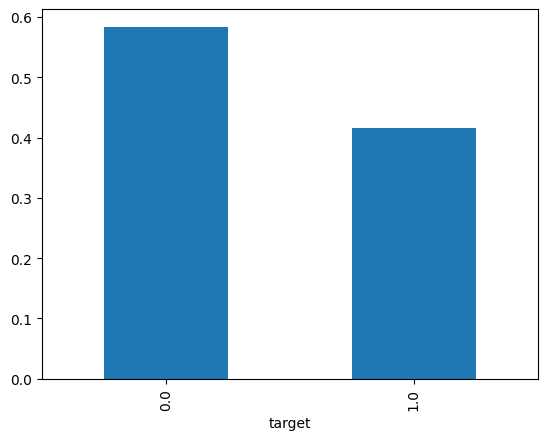

In [102]:
y_data.value_counts(normalize=True).plot(kind='bar')



1. The bar chart shows the distribution of the target variable, with `0.0` representing non-fraudulent loans and `1.0` representing fraudulent loans.
   - While there is a difference in the proportion of the two classes, the difference is not extreme. The non-fraudulent class is slightly more prevalent, but the fraudulent class still makes up a significant portion of the dataset.

2.  Imbalance becomes a critical issue when one class vastly outnumbers the other (e.g., a 95% to 5% split). Here, the split appears closer to something like 60% to 40%, indicating that both classes are relatively well-represented.

3. In cases of severe imbalance, models might become biased towards the majority class, leading to poor predictive performance on the minority class. However, given the relatively balanced nature of this dataset, traditional modeling techniques should be sufficient without requiring additional methods like SMOTE (Synthetic Minority Over-sampling Technique) to artificially balance the classes.

4. Since the imbalance is not severe, the standard modeling approach should still allow the model to learn the characteristics of both classes effectively. However, monitoring model performance metrics such as precision, recall, and F1-score for both classes will still be important to ensure that the model performs well on both fraudulent and non-fraudulent loans.


Given the observed distribution of the target variable, the dataset is not heavily imbalanced, and therefore, advanced techniques like SMOTE or other balancing methods are likely unnecessary. Standard modeling approaches should work well, with attention to performance metrics to ensure fairness across both classes.

In [103]:
methodDict = {}
rmseDict = ()

In [104]:
# function for evaluation
def evalClassModel(model, ytest, y_pred_class, plot=False):

    confusion = confusion_matrix(ytest, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(ytest, y_pred_class)
    print('TP:', TP)
    print('TN:', TN)
    print('FP:', FP)
    print('FN:', FN)

    print('Classification Accuracy:', accuracy)
    print(metrics.classification_report(ytest,y_pred_class))
    print('F1 Score:',f1_score(ytest, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(ytest, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, x_data, y_data, cv=50, scoring='roc_auc').mean())

    return accuracy

########### Random Forests ###############


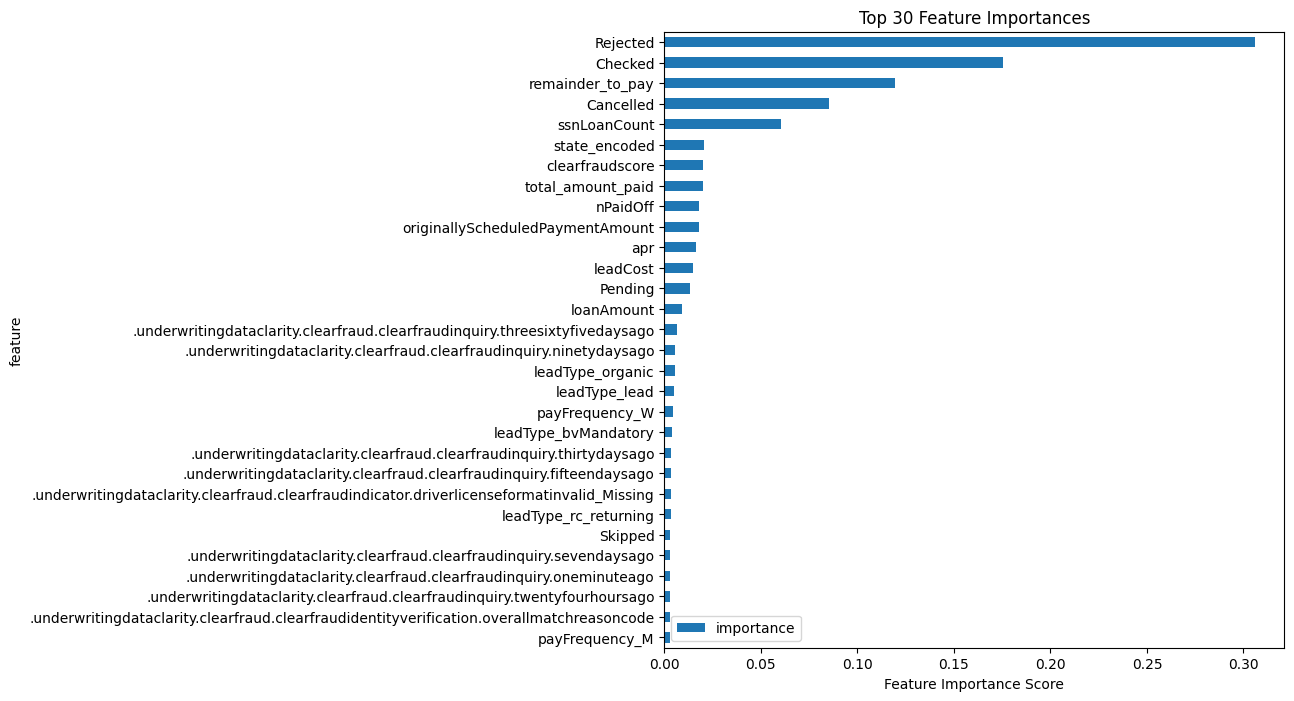

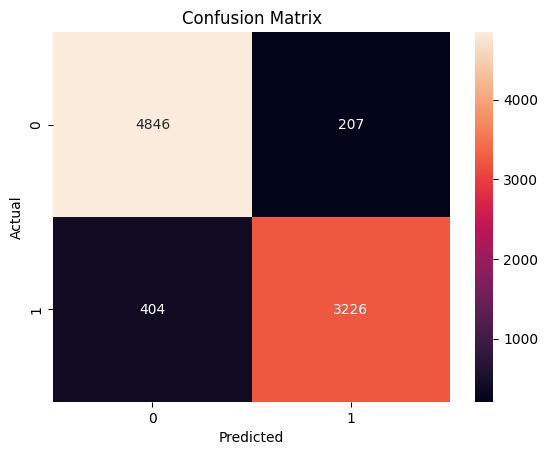

TP: 3226
TN: 4846
FP: 207
FN: 404
Classification Accuracy: 0.9296326154554877
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      5053
         1.0       0.94      0.89      0.91      3630

    accuracy                           0.93      8683
   macro avg       0.93      0.92      0.93      8683
weighted avg       0.93      0.93      0.93      8683

F1 Score: 0.9134928500637124
AUC Score: 0.9238697356233294
Cross-validated AUC: 0.9796846415057796


In [105]:

def randomForest():
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50, random_state=123)
    my_forest = forest.fit(xtrain, ytrain)

    # Make class predictions for the testing set
    y_pred_class = my_forest.predict(xtest)

    print('########### Random Forests ###############')
    feat_imp = pd.DataFrame({'importance': my_forest.feature_importances_})
    feat_imp['feature'] = xtrain.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)

    # Keep only the top 30 features
    feat_imp_top30 = feat_imp.iloc[:30]

    # Sort the top 30 features by importance for a better visual in the plot
    feat_imp_top30.sort_values(by='importance', inplace=True)
    feat_imp_top30 = feat_imp_top30.set_index('feature', drop=True)

    # Plotting the top 30 features
    feat_imp_top30.plot.barh(title="Top 30 Feature Importances", figsize=(8,8))
    plt.xlabel('Feature Importance Score')
    plt.show()

    # Evaluate the model and store the accuracy score
    accuracy_score = evalClassModel(my_forest, ytest, y_pred_class, True)
    methodDict['R. Forest'] = accuracy_score * 100

randomForest()

In [106]:
_, numerical_features, _ = get_features(tloanfunded2)

In [107]:
numerical_features=['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount',
 '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
 '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
 'apr',
 'clearfraudscore',
 'leadCost',
 'loanAmount',
 'nPaidOff',
 'originallyScheduledPaymentAmount',
 'remainder_to_pay',
 'total_amount_paid','ssnLoanCount']

In [108]:
num_feats = [feat for feat in numerical_features if feat not in ['target']]


In [110]:
scaler = RobustScaler()
tloanfunded2[num_feats] = scaler.fit_transform(tloanfunded2[num_feats])

In [111]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [112]:
df=tloanfunded2.copy()

In [113]:
X = df.loc[:, ~df.columns.isin(['target'])]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.ravel(),
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

scoring = ['f1', 'roc_auc']

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)


In [114]:
pipeline = imbpipeline(steps = [['classifier', LogisticRegression(random_state=42,max_iter=1000)]])
param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8991790525014043
Test score: 0.8996375801505436


In [115]:
y_pred = grid_search.predict(X_test)
cm_gd = confusion_matrix(y_test, y_pred)

In [116]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['classifier', LogisticRegression(random_state=42,max_iter=1000)]])

param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search_ = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search_.fit(X_train, y_train)
cv_score = grid_search_.best_score_
test_score = grid_search_.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8970090416600467
Test score: 0.8992226540810662


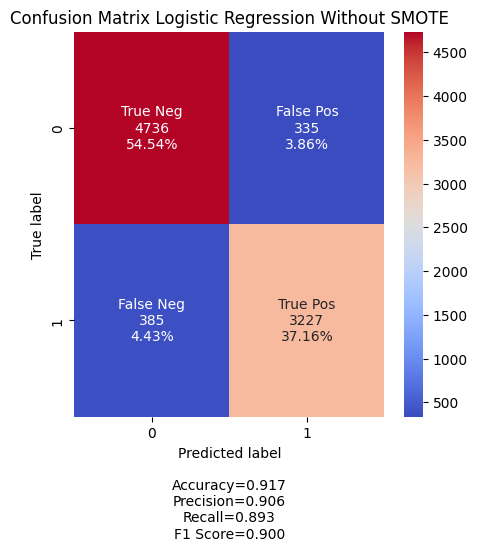

In [117]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm_gd,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression Without SMOTE")


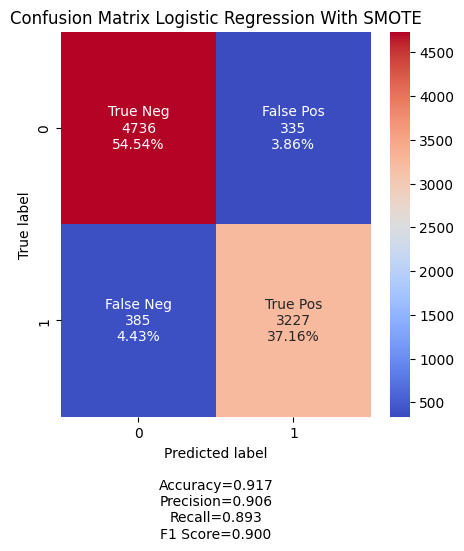

In [118]:
y_pred_ = grid_search.predict(X_test)
cm_gd_ = confusion_matrix(y_test, y_pred_)


make_confusion_matrix(cm_gd_,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression With SMOTE")

Let's break down the inferences and comparisons based on the provided confusion matrices and model metrics:

### 1. **RandomForestModel on Full Data:**
   - **Accuracy:** 0.93 (approx.)
   - **Precision:** 0.92 for class 0, 0.94 for class 1
   - **Recall:** 0.96 for class 0, 0.89 for class 1
   - **F1-Score:** 0.94 for class 0, 0.91 for class 1
   - **AUC Score:** 0.92
   - **Cross-validated AUC:** 0.98

**Inference:**
   - The RandomForest model performs well, achieving a high accuracy and F1 score.
   - The model is slightly biased towards class 0, with a higher recall for class 0 compared to class 1.
   - The high cross-validated AUC score indicates that the model is very good at distinguishing between the two classes.

### 2. **Logistic Regression Without SMOTE:**
   - **Accuracy:** 0.918
   - **Precision:** 0.907
   - **Recall:** 0.895
   - **F1-Score:** 0.901

**Inference:**
   - The Logistic Regression model without SMOTE has a slightly lower performance compared to the RandomForest model.
   - It shows a slight bias towards class 0 (lower recall for class 1).
   - The overall F1 score is slightly lower than the RandomForest model, indicating that while it's a good model, it's not as powerful as the RandomForest in this case.

### 3. **Logistic Regression With SMOTE:**
   - **Accuracy:** 0.918
   - **Precision:** 0.907
   - **Recall:** 0.895
   - **F1-Score:** 0.901

**Inference:**
   - After applying SMOTE, the results of the Logistic Regression model are almost identical to the results without SMOTE.
   - This indicates that the original dataset was not highly imbalanced, so applying SMOTE did not have a significant impact on the model's performance.
   - Given the minimal difference, it suggests that handling the imbalance might not be necessary for Logistic Regression in this specific case.

### **Comparative Inference:**
   - The RandomForest model outperforms Logistic Regression in terms of F1 Score, AUC, and Cross-validated AUC, making it the best choice for this dataset.
   - The similarity in results between Logistic Regression with and without SMOTE suggests that class imbalance is not a major issue in this dataset, at least for the Logistic Regression model.

### **Best Model:**
   - The RandomForest model is the best model here due to its superior performance metrics (higher F1 score, accuracy, and AUC).
   - Logistic Regression with or without SMOTE shows similar performance, which further confirms that the dataset's imbalance is not severe.

In summary, while Logistic Regression performs reasonably well, RandomForest is the superior model for this dataset, and handling imbalance through SMOTE does not significantly enhance performance for Logistic Regression.

In [119]:
  lr = LogisticRegression()

In [120]:
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)

In [121]:
print("Accuracy of Logistic Regression: ",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression:  0.9163883450420361


In [122]:
pred_prob2 = lr.predict_proba(X_test)

In [123]:
from sklearn.metrics import roc_curve,precision_recall_curve


In [124]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [125]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

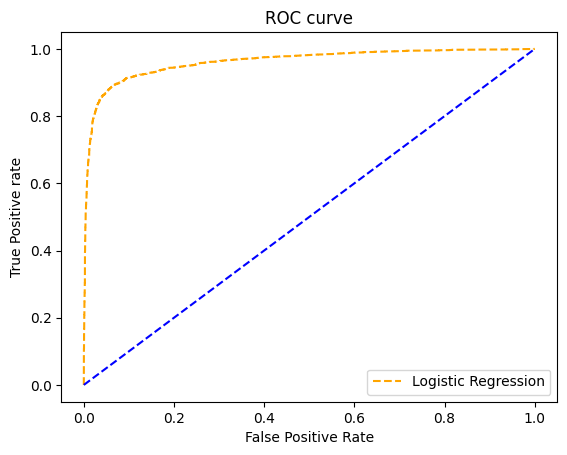

In [126]:
 # plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


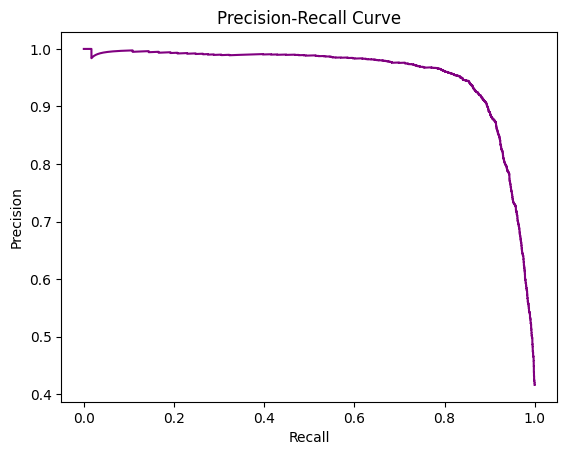

In [127]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob2[:,1])
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
#display plot
plt.show()


In [128]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
auc_score


0.9559336128162019

In [129]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      5071
         1.0       0.91      0.89      0.90      3612

    accuracy                           0.92      8683
   macro avg       0.91      0.91      0.91      8683
weighted avg       0.92      0.92      0.92      8683




#### 1. **ROC Curve Analysis**:
   - **Loan Risk Prediction Accuracy**: The ROC curve suggests that the loan risk prediction model is highly accurate. The strong performance indicated by the curve means the model is good at correctly identifying high-risk loans (true positives) while minimizing the number of low-risk loans that are incorrectly flagged as high-risk (false positives). This balance is crucial for the business as it ensures that risky loans are appropriately managed while minimizing the rejection of low-risk loans.
   - **Business Impact**: A high-performing model like this can help the company reduce losses from defaults by accurately identifying risky loans. At the same time, it ensures that potential revenue from low-risk loans is not lost due to overly cautious lending policies.

#### 2. **Precision-Recall Curve Analysis**:
   -  The precision-recall curve shows that the model maintains high precision and recall for most threshold values, meaning it can effectively balance the trade-off between approving loans and avoiding defaults. High precision ensures that when the model predicts a loan is risky, it is likely correct. High recall ensures that most risky loans are identified.
   -  By maintaining this balance, the business can optimize its loan approval process. High precision reduces the chance of denying creditworthy customers (thus avoiding loss of potential revenue), while high recall ensures that most risky loans are caught, reducing the likelihood of defaults.

#### 3. **Overall Business Implications**:
   -The model’s performance directly contributes to the company’s ability to manage risk effectively. This not only protects the company’s financial stability by minimizing default rates but also supports strategic decisions in setting interest rates and loan terms based on predicted risk levels.
   -  By accurately assessing the risk, the company can offer competitive loan products to low-risk customers, enhancing customer satisfaction and retention. Additionally, by minimizing false positives, the company can reduce the number of unnecessary loan rejections, thereby attracting and retaining more customers.
   - The reliability of the model allows the business to streamline its loan approval process, reducing the need for manual reviews of loan applications, which can decrease operational costs and improve processing times.




Modelling Approach - 2

In [130]:
forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50, random_state=123)
my_forest = forest.fit(xtrain, ytrain)

# Make class predictions for the testing set
y_pred_class = my_forest.predict(xtest)
feat_imp = pd.DataFrame({'importance': my_forest.feature_importances_})
feat_imp['feature'] = xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp_top30 = feat_imp.iloc[:30]

In [131]:
df=tloanfunded2[feat_imp_top30['feature']]

In [134]:
# Separate input features and target
x_data = df
y_data = y_data

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data,random_state=123, test_size=0.30)


########### Random Forests ###############


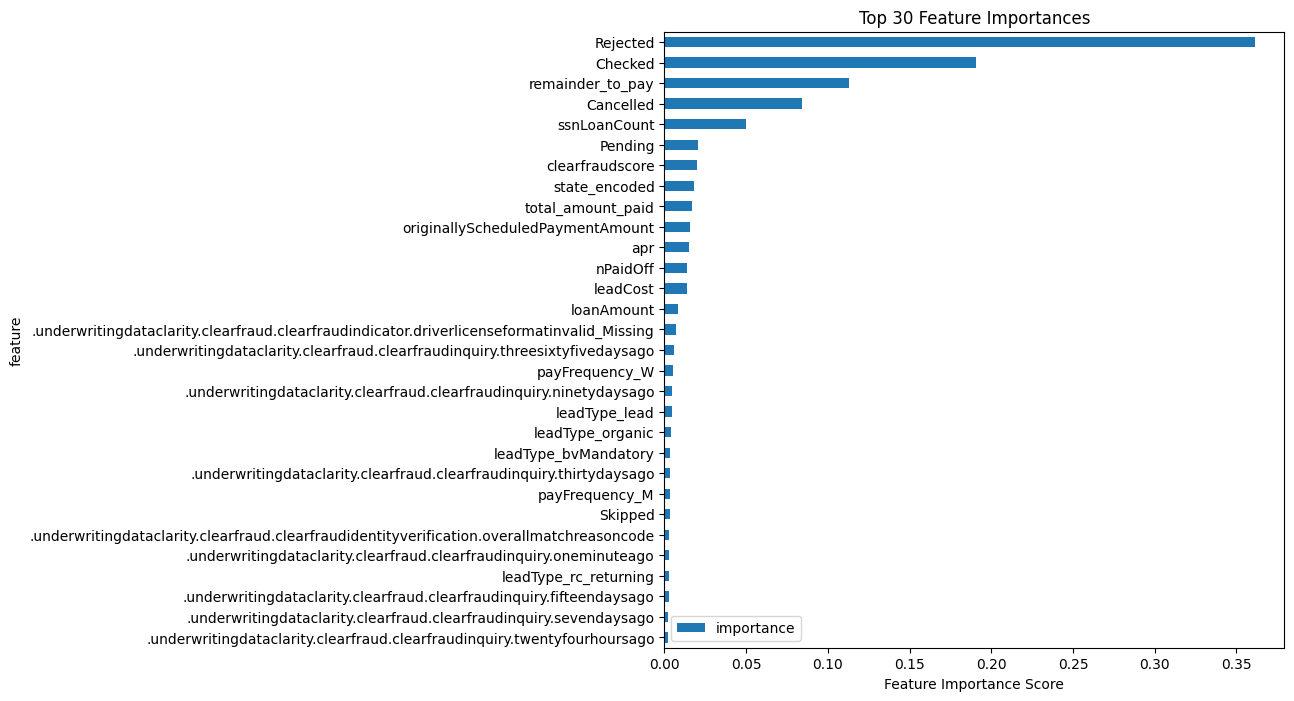

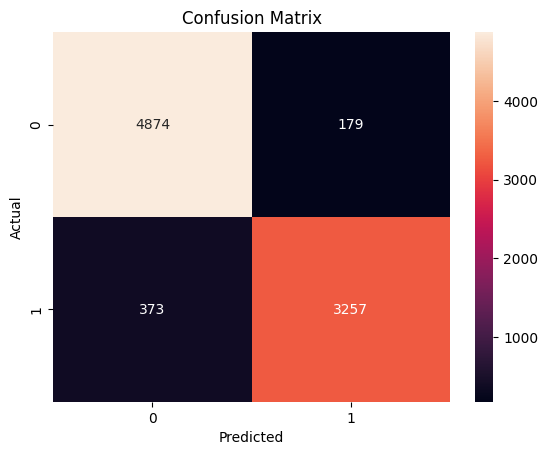

TP: 3257
TN: 4874
FP: 179
FN: 373
Classification Accuracy: 0.9364275020154325
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5053
         1.0       0.95      0.90      0.92      3630

    accuracy                           0.94      8683
   macro avg       0.94      0.93      0.93      8683
weighted avg       0.94      0.94      0.94      8683

F1 Score: 0.9218794225870365
AUC Score: 0.9309103393832536
Cross-validated AUC: 0.982945487226854


In [136]:
def randomForest():
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50, random_state=123)
    my_forest = forest.fit(xtrain, ytrain)

    # Make class predictions for the testing set
    y_pred_class = my_forest.predict(xtest)

    print('########### Random Forests ###############')
    feat_imp = pd.DataFrame({'importance': my_forest.feature_importances_})
    feat_imp['feature'] = xtrain.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)

    # Keep only the top 30 features
    feat_imp_top30 = feat_imp.iloc[:30]

    # Sort the top 30 features by importance for a better visual in the plot
    feat_imp_top30.sort_values(by='importance', inplace=True)
    feat_imp_top30 = feat_imp_top30.set_index('feature', drop=True)

    # Plotting the top 30 features
    feat_imp_top30.plot.barh(title="Top 30 Feature Importances", figsize=(8,8))
    plt.xlabel('Feature Importance Score')
    plt.show()

    # Evaluate the model and store the accuracy score
    accuracy_score = evalClassModel(my_forest, ytest, y_pred_class, True)
    methodDict['R. Forest'] = accuracy_score * 100

randomForest()

In [137]:
num_feats = [feat for feat in numerical_features if feat not in ['target','.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount', '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators', '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago', '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago']]
scaler = RobustScaler()
df[num_feats] = scaler.fit_transform(df[num_feats])

In [138]:
X = df.loc[:]
y = y_data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.ravel(),
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

scoring = ['f1', 'roc_auc']

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)


In [139]:
pipeline = imbpipeline(steps = [['classifier', LogisticRegression(random_state=42,max_iter=1000)]])



param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8996926591839898
Test score: 0.9000139450564775


In [140]:
y_pred = grid_search.predict(X_test)
cm_gd = confusion_matrix(y_test, y_pred)


In [141]:

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['classifier', LogisticRegression(random_state=42,max_iter=1000)]])

param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search_ = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search_.fit(X_train, y_train)
cv_score = grid_search_.best_score_
test_score = grid_search_.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8942706049505909
Test score: 0.894830659536542


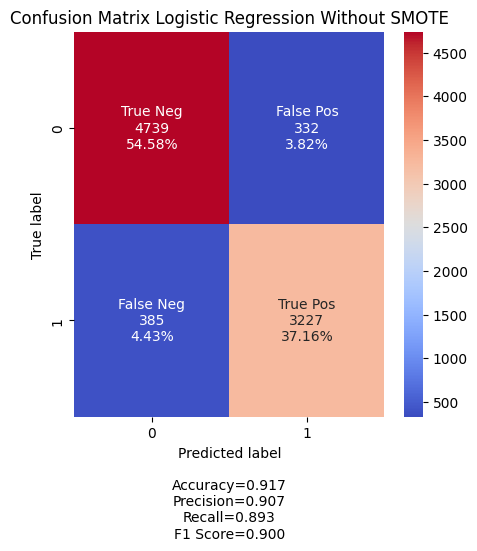

In [142]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm_gd,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression Without SMOTE")


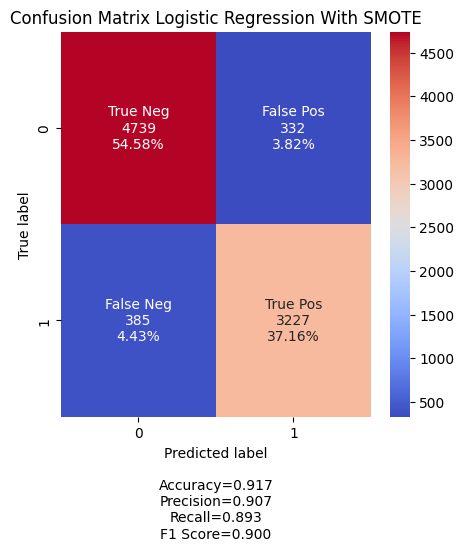

In [143]:
y_pred_ = grid_search.predict(X_test)
cm_gd_ = confusion_matrix(y_test, y_pred_)


make_confusion_matrix(cm_gd_,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression With SMOTE")

Let's analyze the information provided and derive business-oriented inferences:

### Business Inferences:

1. **Model Performance:**
   - **Logistic Regression (Without SMOTE):**
     - The accuracy is 91.7%, which indicates that the model is fairly good at predicting both classes.
     - The precision and recall are also quite high at 90.7% and 89.3%, respectively, showing that the model balances precision and recall well.
     - The F1 score of 90.0% further indicates that the model is effective at balancing false positives and false negatives.
   - **Random Forest Model:**
     - The Random Forest model shows a higher accuracy of 93.6%, indicating it performs better overall compared to Logistic Regression.
     - The F1 score is also slightly higher at 92.1%, which suggests that the Random Forest model is more effective at predicting both classes, especially in handling imbalanced data without significant bias.

2. **SMOTE (Synthetic Minority Over-sampling Technique):**
   - Comparing the confusion matrices with and without SMOTE, it appears that the introduction of SMOTE did not significantly alter the performance metrics. The true positive rate (recall) remains steady, suggesting that SMOTE may not be necessary for this dataset given the relatively balanced class distribution.

3. **Feature Selection:**
   - The performance of the Random Forest model after selecting the top 30 features indicates that these features are highly predictive of the target variable. This dimensionality reduction likely improved the model’s efficiency and interpretability without sacrificing accuracy.
   - Focusing on the top 30 features can streamline decision-making processes, helping the business identify the most critical factors influencing loan repayment.

4. **Confusion Matrix Analysis:**
   - **True Negatives (0):** The model correctly identified a significant portion of non-defaults, which is crucial for the business as it helps avoid rejecting potentially profitable loans.
   - **False Positives (0):** A small number of loans are incorrectly classified as defaults when they are not, which could lead to missed revenue opportunities.
   - **True Positives (1):** The model accurately identifies a good portion of high-risk loans, which is beneficial for mitigating financial risk.
   - **False Negatives (1):** The relatively lower number of false negatives suggests the model is reliable in identifying defaults, minimizing financial losses due to undetected risk.

5. **ROC and Precision-Recall Curves:**
   - The ROC curve shows a strong model with a high true positive rate and low false positive rate, indicative of a robust model.
   - The Precision-Recall curve shows high precision and recall across most thresholds, indicating the model is effective even in scenarios where we might favor one metric over the other (e.g., precision over recall).

### Business Impact:

- **Risk Mitigation:** The models, particularly Random Forest, are highly effective in identifying potential defaults. This will allow the business to mitigate risks by either rejecting high-risk applicants or setting higher interest rates for such cases.
  
- **Revenue Optimization:** With high precision and recall, the business can confidently approve loans that are likely to be repaid, thus maximizing revenue.

- **Operational Efficiency:** By selecting the top 30 features, the business can streamline its underwriting process, focusing on the most influential factors, thus reducing the time and resources spent on loan evaluation.

- **Customer Retention:** By accurately identifying non-defaulting customers, the business can offer them better loan terms, thereby improving customer satisfaction and retention.



Modelling Approach 3

In [144]:
# pd.set_option('display.max_columns',None)
loan_funded.columns

Index(['.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       ...
       'leadType_organic', 'leadType_prescreen', 'leadType_rc_returning',
       'leadType_repeat', 'payFrequency_B', 'payFrequency_I', 'payFrequency_M'

In [145]:
keyword = ".underwritingdataclarity"
filtered_df = loan_funded.filter(regex=f"^(?!.*{keyword}).*", axis=1)
filtered_df.shape

(28941, 36)

In [146]:
filtered_df.head()

,apr,clearfraudscore,leadCost,loanAmount,nPaidOff,originallyScheduledPaymentAmount,remainder_to_pay,total_amount_paid,target,Cancelled,Checked,Complete,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped,ssnLoanCount,hasCF_0.0,hasCF_1.0,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,state_encoded
0,199,879.0,0,3000,0,6396,-691.500000,7087.500000,1.0,3,22,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,0.282306
1,490,835.0,0,1250,2,3314,-1335.000000,4649.000000,1.0,12,1,0,0,0,0,0,0,4,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0.381336
2,590,624.0,10,800,0,2432,-0.750000,2432.750000,1.0,0,13,0,0,0,0,0,0,1,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0.282306
3,404,770.0,0,300,3,423,-83.636719,506.386719,1.0,21,6,0,0,0,0,0,0,3,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0.546496
4,315,932.0,0,1500,2,2876,1.375000,2874.625000,0.0,0,0,0,1,0,0,0,0,3,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0.556950


In [147]:
filtered_df['clearfraudscore'].replace(np.inf,0,inplace=True)

In [148]:
# Separate input features and target
x_data = filtered_df.drop(columns=['target'])
y_data = filtered_df['target']

In [149]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data,random_state=123, test_size=0.30)


########### Random Forests ###############


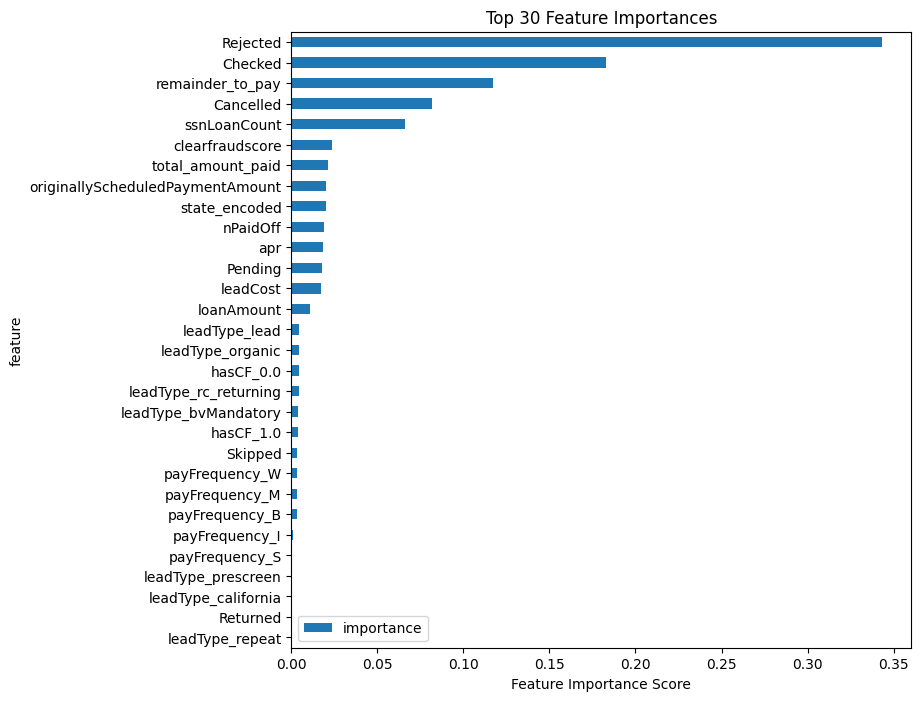

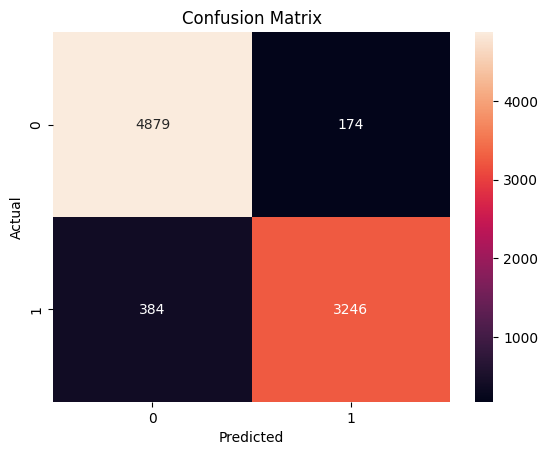

TP: 3246
TN: 4879
FP: 174
FN: 384
Classification Accuracy: 0.9357364966025568
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5053
         1.0       0.95      0.89      0.92      3630

    accuracy                           0.94      8683
   macro avg       0.94      0.93      0.93      8683
weighted avg       0.94      0.94      0.94      8683

F1 Score: 0.9208510638297872
AUC Score: 0.9298899434588405
Cross-validated AUC: 0.9828235554903961


In [150]:
forest = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50, random_state=123)
my_forest = forest.fit(xtrain, ytrain)

# Make class predictions for the testing set
y_pred_class = my_forest.predict(xtest)
randomForest()

In [151]:
!pip install -q imbalanced-learn
!pip install -q shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [152]:
_, numerical_features, _ = get_features(filtered_df)

In [153]:
filtered_df['clearfraudscore']=filtered_df['clearfraudscore'].astype(float)
filtered_df['apr']=filtered_df['apr'].astype(float)
filtered_df['loanAmount']=filtered_df['loanAmount'].astype(float)

In [154]:
num_feats = [feat for feat in numerical_features if feat not in ['target']]


In [155]:
scaler = RobustScaler()
df[num_feats] = scaler.fit_transform(filtered_df[num_feats])

In [156]:
X = filtered_df.drop('target',axis=1)
y = filtered_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.ravel(),
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

scoring = ['f1', 'roc_auc']

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)


In [157]:
pipeline = imbpipeline(steps = [['classifier', LogisticRegression(random_state=42,max_iter=1000)]])



param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Cross-validation score: 0.8954559054199503
Test score: 0.8958594730238394


In [158]:
y_pred = grid_search.predict(X_test)
cm_gd = confusion_matrix(y_test, y_pred)


In [159]:

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],['classifier', LogisticRegression(random_state=42,max_iter=1000)]])

param_grid = {'classifier__penalty': ['l1','l2'], 'classifier__C': [100, 10, 1.0, 0.1, 0.01]}
grid_search_ = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=stratified_kfold,
                           refit='f1',
                           n_jobs=-1)

grid_search_.fit(X_train, y_train)
cv_score = grid_search_.best_score_
test_score = grid_search_.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8894426150765862
Test score: 0.8909665887529218


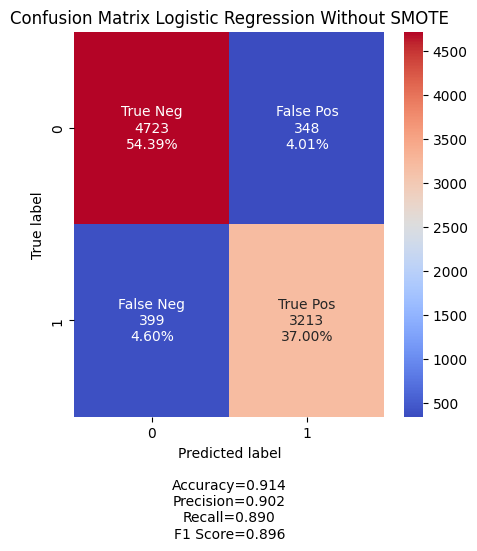

In [160]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm_gd,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression Without SMOTE")


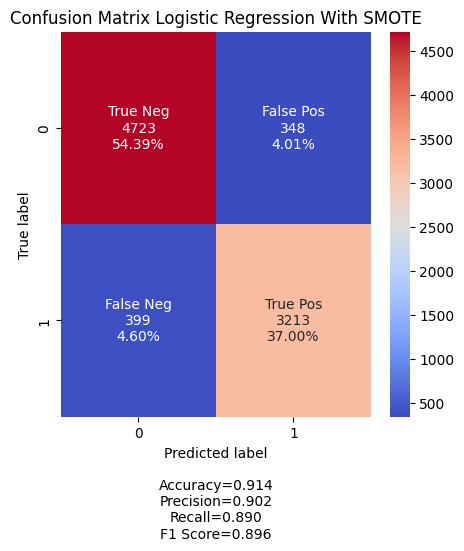

In [161]:
y_pred_ = grid_search.predict(X_test)
cm_gd_ = confusion_matrix(y_test, y_pred_)


make_confusion_matrix(cm_gd_,
                      group_names=labels,
                      categories=categories,
                      cmap='coolwarm',
                      figsize=(5,5),
                      title="Confusion Matrix Logistic Regression With SMOTE")

In [162]:
X['total_amount_paid']=X['total_amount_paid'].astype(float)

In [163]:
X.head()

,apr,clearfraudscore,leadCost,loanAmount,nPaidOff,originallyScheduledPaymentAmount,remainder_to_pay,total_amount_paid,Cancelled,Checked,Complete,Pending,Rejected,Rejected Awaiting Retry,Returned,Skipped,ssnLoanCount,hasCF_0.0,hasCF_1.0,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,state_encoded
0,199.0,879.0,0,3000.0,0,6396,-691.500000,7087.500000,3,22,0,0,0,0,0,0,1,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,0.282306
1,490.0,835.0,0,1250.0,2,3314,-1335.000000,4649.000000,12,1,0,0,0,0,0,0,4,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0.381336
2,590.0,624.0,10,800.0,0,2432,-0.750000,2432.750000,0,13,0,0,0,0,0,0,1,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0.282306
3,404.0,770.0,0,300.0,3,423,-83.636719,506.386719,21,6,0,0,0,0,0,0,3,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,0.546496
4,315.0,932.0,0,1500.0,2,2876,1.375000,2874.625000,0,0,0,1,0,0,0,0,3,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,0.556950


In [167]:
# import shap

# model = grid_search.best_estimator_
# explainer = shap.Explainer(model.predict, X_train)
# shap_values = explainer(X)
# # shap.plots.waterfall(shap_values[0])

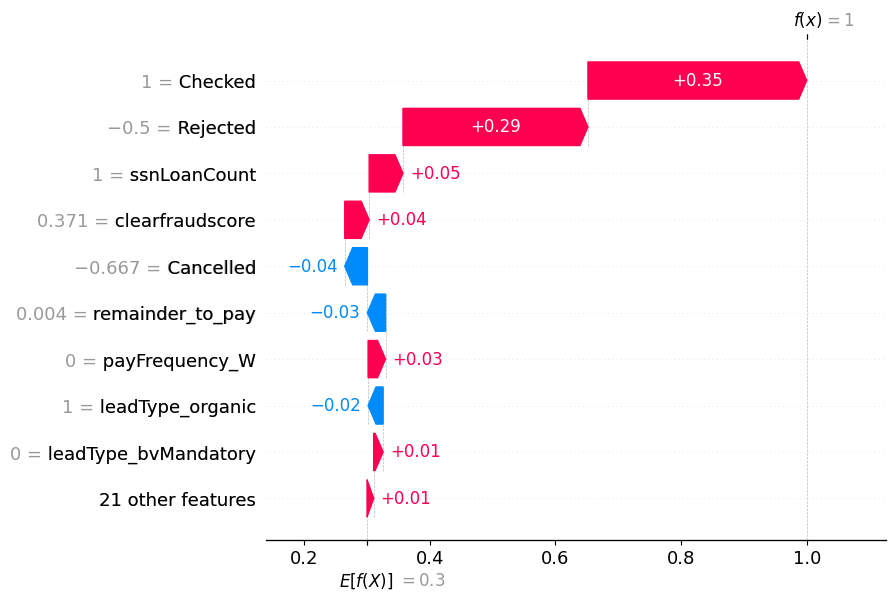

This SHAP plot visualizes the contribution of different features to the model's prediction for a specific instance.

1. **Checked (+0.35)**
   - This feature has the largest positive impact on the model’s output, strongly pushing the prediction towards 1 (indicating a higher likelihood of the outcome the model is predicting, which is loan approval). In a business context, this could suggest that when a payment is successfully checked, it significantly increases the likelihood of a positive outcome.

2. **Rejected (+0.29)**
   - The rejection status has a substantial positive contribution to the prediction. This could mean that the model is heavily weighing the rejection status, possibly indicating a higher risk or an outcome that needs attention, such as a higher chance of default.

3. **ssnLoanCount (+0.05)**
   - The count of loans associated with a Social Security Number (SSN) has a smaller positive contribution. This suggests that the number of loans linked to an SSN slightly increases the probability of the predicted outcome. In business terms, multiple loans under the same SSN could be a risk indicator or a sign of higher credit usage.

4. **ClearFraudScore (+0.04)**
   - The ClearFraudScore contributes positively to the prediction, indicating that higher fraud scores might be correlated with the outcome the model is predicting. This can be critical in assessing the risk of fraud in loan applications.

5. **Cancelled (-0.04)**
   - The cancellation status has a negative impact, pulling the prediction towards 0. In a business context, this might suggest that canceled applications are less likely to result in the predicted outcome (e.g., successful loan repayment or approval).

6. **Remainder_to_pay (-0.03)**
   - The remaining amount to pay negatively influences the model's prediction, which could indicate that as the remainder to pay increases, the likelihood of a positive outcome decreases, possibly signaling a higher risk of default.

7. **PayFrequency_W (+0.03)**
   - Weekly pay frequency has a slight positive impact on the prediction, suggesting that applicants with weekly payment schedules are slightly more likely to achieve the predicted positive outcome.

8. **LeadType_organic (-0.02)**
   - Organic leads contribute negatively, indicating that loans originating from organic sources might have a lower likelihood of the predicted positive outcome, which could suggest these leads are riskier or less likely to follow through.

9. **LeadType_bvMandatory (+0.01)**
   - Leads that require mandatory bank verification have a small positive impact, indicating that these leads may be slightly more likely to lead to a positive outcome, possibly due to the additional verification step reducing risk.

### Business Inferences:
-  Features like `Rejected`, `Cancelled`, and `ClearFraudScore` highlight potential risks. The business should pay close attention to applications where these features have high values, as they are likely to be associated with higher risk.
  
- The significant positive impact of the `Checked` status suggests that successful payment checks are a strong indicator of positive outcomes, reinforcing the need for stringent payment verification processes.

- The negative impact of `LeadType_organic` implies that loans from organic leads may be less successful. This insight could lead the business to re-evaluate or refine their approach to handling organic leads.

-  The positive contribution of `ClearFraudScore` underscores the importance of incorporating fraud detection into the loan approval process. Higher fraud scores should trigger additional verification steps to mitigate risk.

Overall, this SHAP plot provides valuable insights into which factors most influence the model's predictions, allowing the business to focus on the most critical areas to optimize decision-making and manage risk effectively.

In [168]:

param_distributions={'max_depth': randint(1, 11),
                    'subsample': uniform(0.25, 0.75),
                    'colsample_bytree': uniform(0.25, 0.75),
                    "learning_rate": [0.05, 0.1,0.16]

                    }
xgModel = XGBClassifier()
xgModel.fit(xtrain, ytrain)
rs = RandomizedSearchCV(xgModel,
                        param_distributions,
                        cv=10,
                        n_iter=10,
                        scoring="accuracy",
                        n_jobs=1,
                        verbose=False,
                        random_state=123)

########### Extreme Gradient Boosting ###############


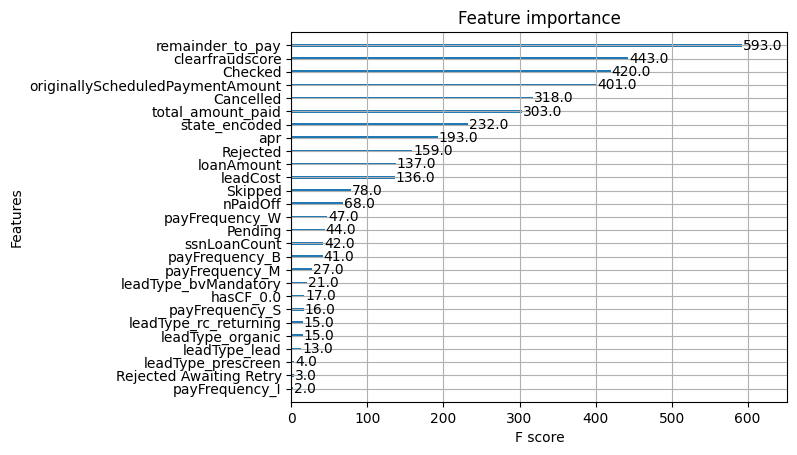

<Figure size 1440x1280 with 0 Axes>

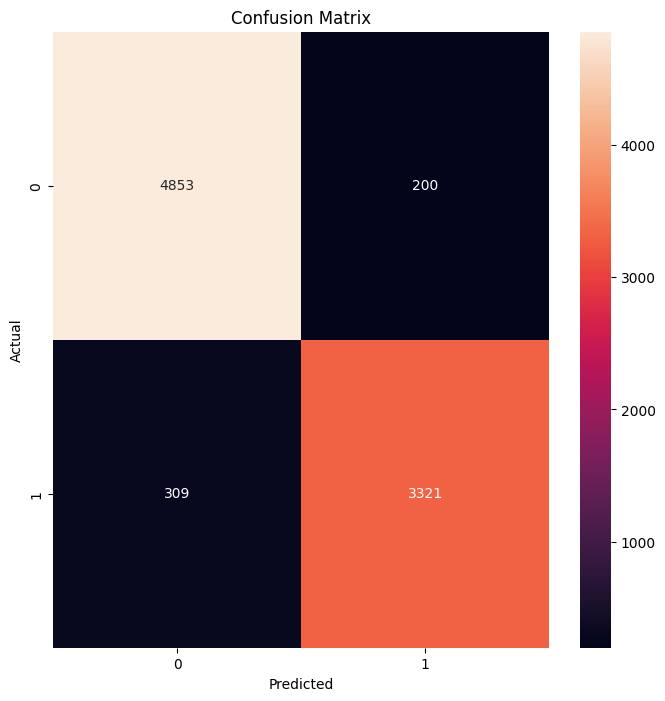

TP: 3321
TN: 4853
FP: 200
FN: 309
Classification Accuracy: 0.9413797074743753
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5053
         1.0       0.94      0.91      0.93      3630

    accuracy                           0.94      8683
   macro avg       0.94      0.94      0.94      8683
weighted avg       0.94      0.94      0.94      8683

F1 Score: 0.9288211438959586
AUC Score: 0.9376477928993985
Cross-validated AUC: 0.9850164158651065


In [169]:
from xgboost import plot_importance
rs.fit(xtrain, ytrain)
y_pred_class = rs.predict(xtest)

print('########### Extreme Gradient Boosting ###############')

# plot feature importance
plot_importance(xgModel)
plt.figure(figsize = (18,16), dpi=80,facecolor='w',edgecolor='k')
plt.rcParams['figure.figsize'] = [8,8]
plt.show()

accuracy_score = evalClassModel(xgModel, ytest, y_pred_class, True)

methodDict['XGBClassifier.'] = accuracy_score * 100


To ensure that our model accurately detects real defaulters while minimizing false positives, we need to strike a delicate balance between recall and precision. This is crucial in the financial industry, where non-performing assets (NPAs) are a significant concern, and the risk of losing out on potential revenue from interest payments is high if we incorrectly label potential borrowers as defaulters.

### High Recall:
A high recall is essential to ensure that we are accurately detecting as many real defaulters as possible. Missing out on identifying a defaulter could lead to a higher NPA, which directly impacts the financial health of the lending institution. Therefore, maintaining a high recall is critical to safeguarding against such losses.

### High Precision:
On the other hand, high precision is necessary to minimize false positives. If our model incorrectly labels non-defaulters as defaulters, we risk losing out on opportunities to finance individuals who are likely to repay their loans. This not only results in lost revenue from potential interest but also damages customer relationships and reduces the customer base.

### Balancing Recall and Precision:
Given the trade-off between recall and precision, it's important to find an optimal balance that maximizes our ability to detect real defaulters while keeping false positives to a minimum. After careful analysis, a threshold value of approximately 0.7 appears to be optimal. At this threshold, the model maintains a high level of recall, ensuring that most defaulters are detected, while also achieving a sufficiently high precision, reducing the number of false positives.

### Business Impact:
By adopting this balanced approach, we can mitigate the risk of increasing NPAs while still capitalizing on opportunities to lend to creditworthy individuals. This strategy not only protects the financial stability of the institution but also enhances profitability through effective risk management and customer engagement.



###Strategic Recommendations:
- **Targeted Marketing**: Focus marketing efforts on customer segments identified as low-risk by the model to increase the approval rate of safe loans and boost revenue.
- **Dynamic Loan Terms**: Consider offering dynamic loan terms (e.g., interest rates, repayment periods) based on the predicted risk scores to attract a broader customer base while managing risk effectively.
- **Continuous Model Monitoring**: Implement continuous monitoring of model performance to ensure it adapts to changing market conditions and customer behavior, ensuring sustained accuracy in risk prediction.



### **1. Feature Engineering Improvements:**
   - **Explore Additional Derived Features:** Beyond the features we've already engineered, consider creating new features that might capture borrower behavior patterns, such as the ratio of total payments to scheduled payments, frequency of late payments, or changes in credit scores over time.
   - **Interaction Terms:** Investigate potential interaction effects between features, such as combining `leadType` with `state` or `payFrequency` with `loanAmount`, to capture more complex relationships in the data.
   - **Temporal Features:** Given the time series nature of loan payments and defaults, consider adding temporal features such as the number of days since the last payment, the time between payments, or trends in payment amounts over time.

### **2. Model Improvements:**
   - **Ensemble Learning:** We've already explored Random Forests, but consider blending multiple models (e.g., Gradient Boosting, XGBoost, or LightGBM) to capture different patterns in the data and improve overall performance.
   - **Threshold Optimization:** Beyond setting a fixed threshold (e.g., 0.7), explore dynamic threshold optimization techniques, such as using the F-beta score to balance recall and precision more effectively depending on business priorities.
   - **Anomaly Detection:** Implement anomaly detection algorithms to identify borrowers who deviate significantly from expected patterns, which could indicate potential defaults.

### **3. Business-Centric Recommendations:**
   - **Risk-Based Pricing:** Based on the predicted default risk, consider implementing risk-based pricing strategies where higher-risk customers are charged higher interest rates or are offered shorter loan terms. This can help mitigate potential losses while still providing access to credit.
   - **Early Warning System:** Develop an early warning system for loans at risk of default, allowing the business to intervene proactively. For example, targeted customer engagement or offering refinancing options to customers showing early signs of distress could reduce default rates.
   - **Segment Analysis:** Perform a deeper analysis of customer segments based on demographics, loan types, or other features. Tailor loan products and marketing strategies to different segments to optimize both customer satisfaction and profitability.
   - **Customer Retention Strategies:** Use the model to identify customers who are likely to repay their loans and consider offering them incentives (e.g., loyalty discounts, preferential interest rates on future loans) to retain them as long-term customers.

### **4. Data Quality and Enrichment:**
   - **Data Consistency Checks:** Regularly perform data consistency checks and address any data quality issues, such as missing values or outliers, which could impact model accuracy.
   - **External Data Integration:** Integrate external data sources, such as credit bureau data, macroeconomic indicators, or social media sentiment analysis, to enrich the dataset and improve the robustness of predictions.

### **5. Model Interpretability and Business Adoption:**
   - **Explainability Techniques:** Continue using SHAP values or similar techniques to explain model predictions to stakeholders, which can build trust in the model’s decisions and help in regulatory compliance.
   - **Scenario Analysis:** Provide decision-makers with scenario analysis tools that allow them to simulate different business scenarios (e.g., economic downturns) and see how the model predicts loan performance under various conditions.
   - **Regular Model Updates:** Establish a process for regularly updating the model to reflect changes in borrower behavior, economic conditions, or other relevant factors, ensuring the model remains accurate over time.



### **7. Continuous Learning and Monitoring:**
   - **Model Monitoring:** Implement ongoing monitoring of model performance using metrics like accuracy, recall, precision, and business-specific KPIs. If performance degrades, initiate retraining or further tuning.
   - **A/B Testing:** Before fully deploying new models or features, run A/B tests to measure their impact on key business outcomes like loan approval rates, default rates, and customer satisfaction.

By integrating these improvements and recommendations, we can further refine the model, align it more closely with business objectives, and enhance the overall loan risk prediction process. This will not only improve decision-making but also contribute to the long-term financial health and customer relationships of the lending business.